<a href="https://colab.research.google.com/github/naiilard/Machine-Learning/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Data Exploration**

In [ ]:
# 1. Import data

import pandas as pd

data = pd.read_excel("Final Data.xlsx")
data

,Water Table Height,Nearest Distance to Human Activities,Farmland,Forest,Shrub,Plantation,Longitude,Latitude,Fire Occurance
0,-0.101642,824.745953,0,0,0,1,100.301319,2.503828,0
1,-0.101642,609.018316,0,0,0,1,100.301319,2.494819,0
2,-0.101642,848.021036,0,0,0,1,100.301319,2.485810,0
3,-0.101642,556.532566,0,0,0,1,100.301319,2.476801,0
4,-0.101642,503.020818,0,0,0,1,100.301319,2.467792,0
...,...,...,...,...,...,...,...,...,...
123511,-0.892458,2394.822828,0,0,0,0,118.571571,1.359685,0
123512,-0.892458,1952.960416,0,0,0,0,118.571571,1.350676,0
123513,-0.892458,1377.389997,0,0,0,0,118.571571,1.341667,0
123514,-0.892458,1137.120812,0,0,0,0,118.580580,1.350676,0


/tmp/ipython-input-2-968282078.py:61: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


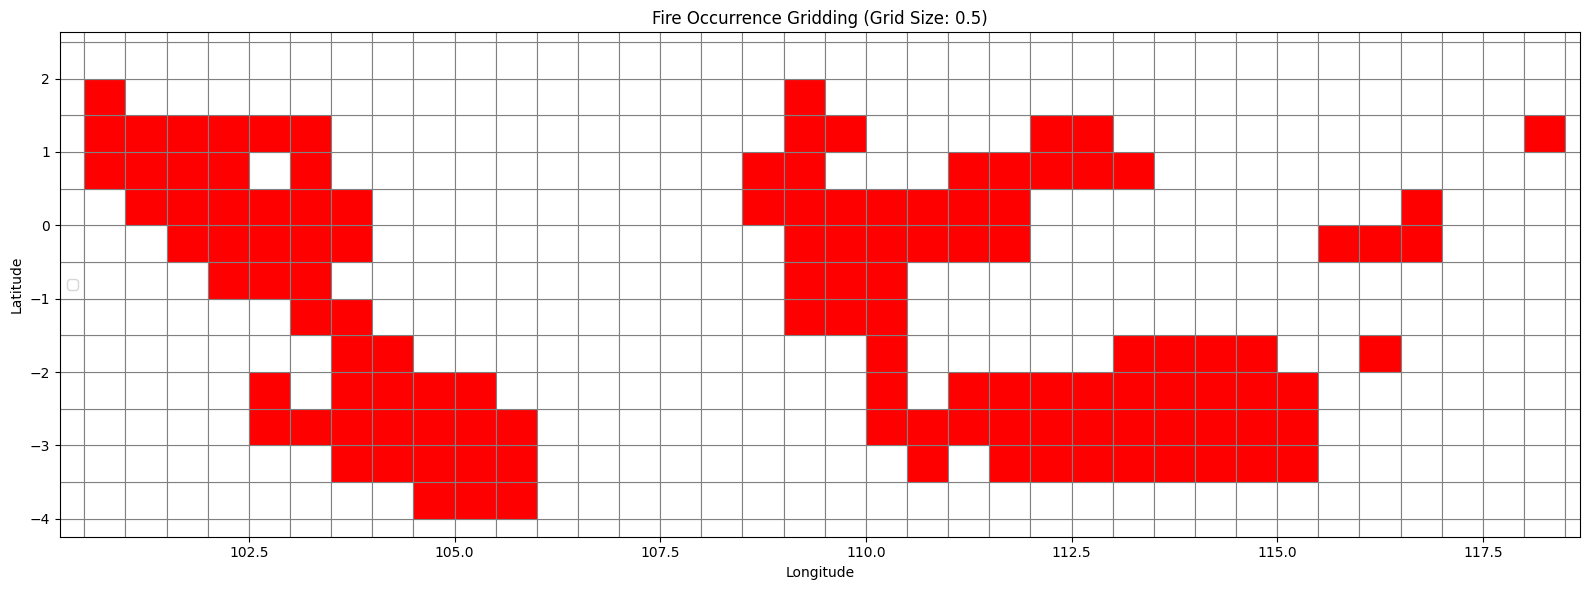

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

grid_size = 0.5

# Buat kolom penanda grid
data['lon_bin'] = (data['Longitude'] // grid_size) * grid_size
data['lat_bin'] = (data['Latitude'] // grid_size) * grid_size
data['grid_id'] = data['lon_bin'].astype(str) + "_" + data['lat_bin'].astype(str)

# Hitung jumlah kebakaran per grid
grid_fire = data.groupby(['lon_bin', 'lat_bin'])['Fire Occurance'].sum().reset_index()
grid_fire.rename(columns={'Fire Occurance': 'fire_count'}, inplace=True)

# -------------------------------
# BUAT GRID LENGKAP (semua kotak!)
# -------------------------------
lon_range = np.arange(data['Longitude'].min() // grid_size * grid_size,
                      data['Longitude'].max() // grid_size * grid_size + grid_size,
                      grid_size)

lat_range = np.arange(data['Latitude'].min() // grid_size * grid_size,
                      data['Latitude'].max() // grid_size * grid_size + grid_size,
                      grid_size)

# Buat kombinasi semua grid yang mungkin
all_grids = pd.MultiIndex.from_product([lon_range, lat_range], names=['lon_bin', 'lat_bin']).to_frame(index=False)

# Gabungkan dengan jumlah titik api
all_grids = pd.merge(all_grids, grid_fire, on=['lon_bin', 'lat_bin'], how='left')
all_grids['fire_count'] = all_grids['fire_count'].fillna(0)

# -------------------------------
# VISUALISASI: semua grid + warna
# -------------------------------
plt.figure(figsize=(16, 6))

for _, row in all_grids.iterrows():
    x = row['lon_bin']
    y = row['lat_bin']
    count = row['fire_count']

    # Jika ada titik api, beri warna berbeda
    if count > 0:
        color = 'red'
    else:
        color = 'white'

    plt.gca().add_patch(plt.Rectangle(
        (x, y), grid_size, grid_size,
        edgecolor='grey',
        facecolor=color,
        linewidth=0.8
    ))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Fire Occurrence Gridding (Grid Size: {grid_size})')
plt.grid(False)
plt.legend()
plt.xlim(data['Longitude'].min() - 0.1, data['Longitude'].max() + 0.1)
plt.ylim(data['Latitude'].min() - 0.1, data['Latitude'].max() + 0.1)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3-2428233326.py:61: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


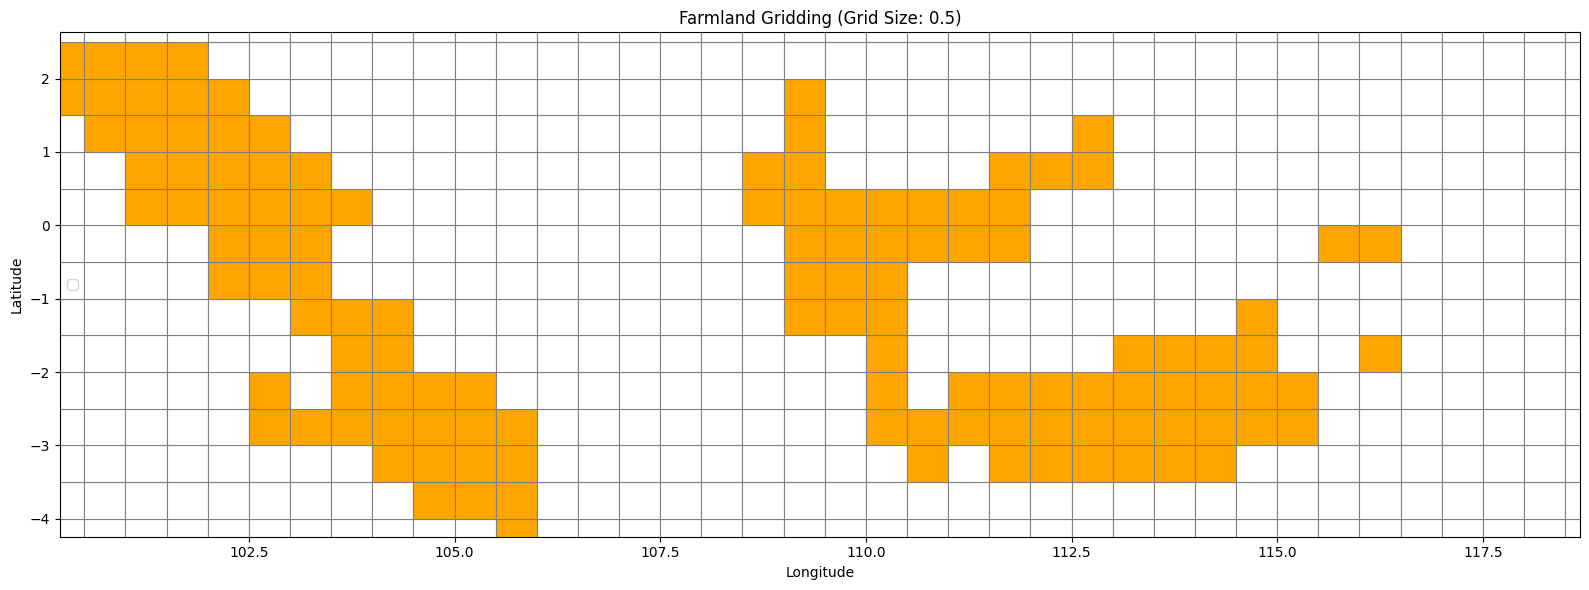

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

grid_size = 0.5

# Buat kolom penanda grid
data['lon_bin'] = (data['Longitude'] // grid_size) * grid_size
data['lat_bin'] = (data['Latitude'] // grid_size) * grid_size
data['grid_id'] = data['lon_bin'].astype(str) + "_" + data['lat_bin'].astype(str)

# Hitung jumlah kebakaran per grid
grid_fire = data.groupby(['lon_bin', 'lat_bin'])['Farmland'].sum().reset_index()
grid_fire.rename(columns={'Farmland': 'farm_count'}, inplace=True)

# -------------------------------
# BUAT GRID LENGKAP (semua kotak!)
# -------------------------------
lon_range = np.arange(data['Longitude'].min() // grid_size * grid_size,
                      data['Longitude'].max() // grid_size * grid_size + grid_size,
                      grid_size)

lat_range = np.arange(data['Latitude'].min() // grid_size * grid_size,
                      data['Latitude'].max() // grid_size * grid_size + grid_size,
                      grid_size)

# Buat kombinasi semua grid yang mungkin
all_grids = pd.MultiIndex.from_product([lon_range, lat_range], names=['lon_bin', 'lat_bin']).to_frame(index=False)

# Gabungkan dengan jumlah titik api
all_grids = pd.merge(all_grids, grid_fire, on=['lon_bin', 'lat_bin'], how='left')
all_grids['farm_count'] = all_grids['farm_count'].fillna(0)

# -------------------------------
# VISUALISASI: semua grid + warna
# -------------------------------
plt.figure(figsize=(16, 6))

for _, row in all_grids.iterrows():
    x = row['lon_bin']
    y = row['lat_bin']
    count = row['farm_count']

    # Jika ada titik api, beri warna berbeda
    if count > 0:
        color = 'orange'
    else:
        color = 'white'

    plt.gca().add_patch(plt.Rectangle(
        (x, y), grid_size, grid_size,
        edgecolor='grey',
        facecolor=color,
        linewidth=0.8
    ))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Farmland Gridding (Grid Size: {grid_size})')
plt.grid(False)
plt.legend()
plt.xlim(data['Longitude'].min() - 0.1, data['Longitude'].max() + 0.1)
plt.ylim(data['Latitude'].min() - 0.1, data['Latitude'].max() + 0.1)
plt.tight_layout()
plt.show()

/tmp/ipython-input-5-3344017830.py:61: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


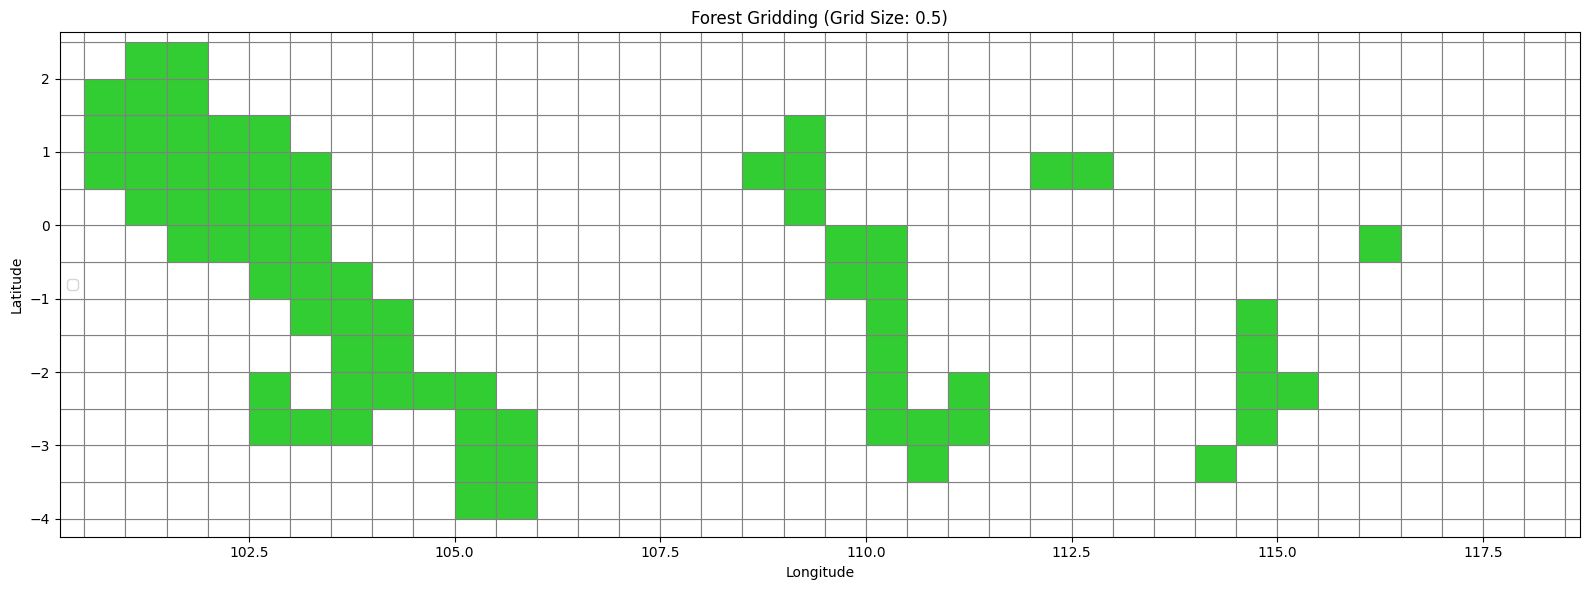

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

grid_size = 0.5

# Buat kolom penanda grid
data['lon_bin'] = (data['Longitude'] // grid_size) * grid_size
data['lat_bin'] = (data['Latitude'] // grid_size) * grid_size
data['grid_id'] = data['lon_bin'].astype(str) + "_" + data['lat_bin'].astype(str)

# Hitung jumlah kebakaran per grid
grid_fire = data.groupby(['lon_bin', 'lat_bin'])['Forest'].sum().reset_index()
grid_fire.rename(columns={'Forest': 'forest_count'}, inplace=True)

# -------------------------------
# BUAT GRID LENGKAP (semua kotak!)
# -------------------------------
lon_range = np.arange(data['Longitude'].min() // grid_size * grid_size,
                      data['Longitude'].max() // grid_size * grid_size + grid_size,
                      grid_size)

lat_range = np.arange(data['Latitude'].min() // grid_size * grid_size,
                      data['Latitude'].max() // grid_size * grid_size + grid_size,
                      grid_size)

# Buat kombinasi semua grid yang mungkin
all_grids = pd.MultiIndex.from_product([lon_range, lat_range], names=['lon_bin', 'lat_bin']).to_frame(index=False)

# Gabungkan dengan jumlah titik api
all_grids = pd.merge(all_grids, grid_fire, on=['lon_bin', 'lat_bin'], how='left')
all_grids['forest_count'] = all_grids['forest_count'].fillna(0)

# -------------------------------
# VISUALISASI: semua grid + warna
# -------------------------------
plt.figure(figsize=(16, 6))

for _, row in all_grids.iterrows():
    x = row['lon_bin']
    y = row['lat_bin']
    count = row['forest_count']

    # Jika ada titik api, beri warna berbeda
    if count > 0:
        color = 'limegreen'
    else:
        color = 'white'

    plt.gca().add_patch(plt.Rectangle(
        (x, y), grid_size, grid_size,
        edgecolor='grey',
        facecolor=color,
        linewidth=0.8
    ))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Forest Gridding (Grid Size: {grid_size})')
plt.grid(False)
plt.legend()
plt.xlim(data['Longitude'].min() - 0.1, data['Longitude'].max() + 0.1)
plt.ylim(data['Latitude'].min() - 0.1, data['Latitude'].max() + 0.1)
plt.tight_layout()
plt.show()

/tmp/ipython-input-6-703954913.py:61: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


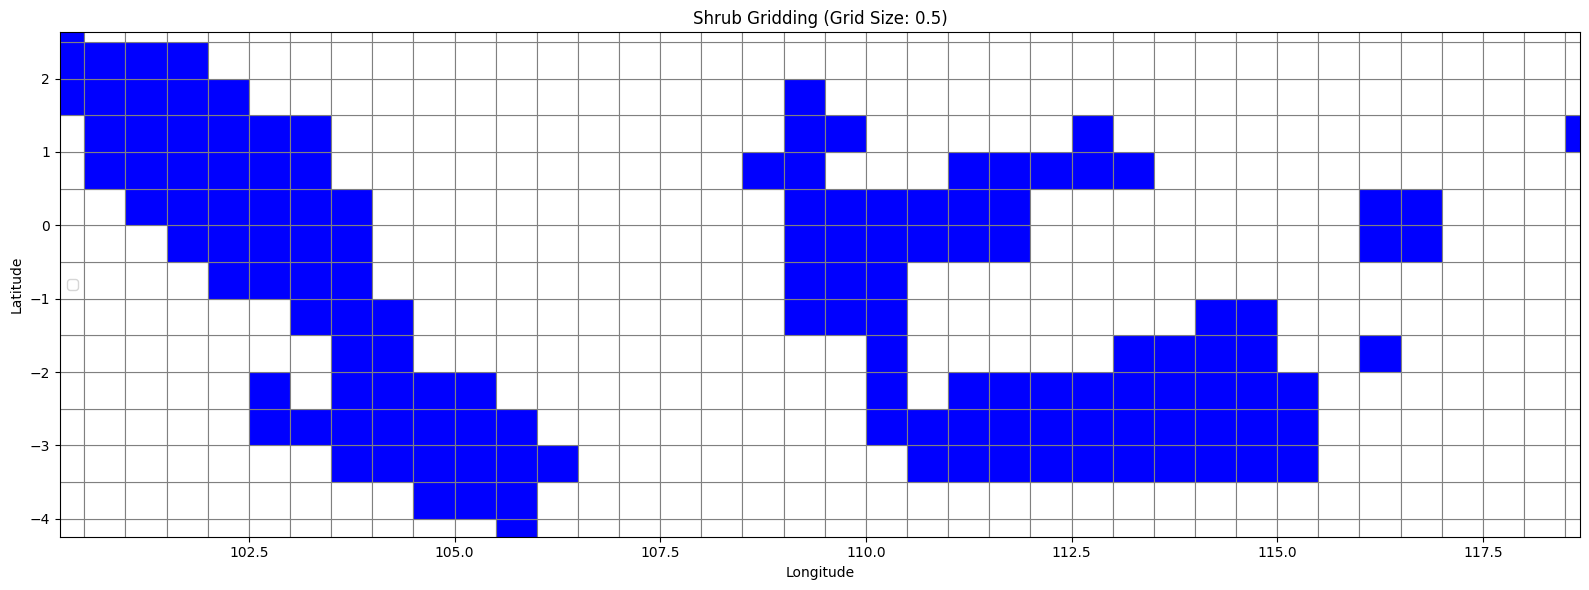

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

grid_size = 0.5

# Buat kolom penanda grid
data['lon_bin'] = (data['Longitude'] // grid_size) * grid_size
data['lat_bin'] = (data['Latitude'] // grid_size) * grid_size
data['grid_id'] = data['lon_bin'].astype(str) + "_" + data['lat_bin'].astype(str)

# Hitung jumlah kebakaran per grid
grid_fire = data.groupby(['lon_bin', 'lat_bin'])['Shrub'].sum().reset_index()
grid_fire.rename(columns={'Shrub': 'forest_count'}, inplace=True)

# -------------------------------
# BUAT GRID LENGKAP (semua kotak!)
# -------------------------------
lon_range = np.arange(data['Longitude'].min() // grid_size * grid_size,
                      data['Longitude'].max() // grid_size * grid_size + grid_size,
                      grid_size)

lat_range = np.arange(data['Latitude'].min() // grid_size * grid_size,
                      data['Latitude'].max() // grid_size * grid_size + grid_size,
                      grid_size)

# Buat kombinasi semua grid yang mungkin
all_grids = pd.MultiIndex.from_product([lon_range, lat_range], names=['lon_bin', 'lat_bin']).to_frame(index=False)

# Gabungkan dengan jumlah titik api
all_grids = pd.merge(all_grids, grid_fire, on=['lon_bin', 'lat_bin'], how='left')
all_grids['forest_count'] = all_grids['forest_count'].fillna(0)

# -------------------------------
# VISUALISASI: semua grid + warna
# -------------------------------
plt.figure(figsize=(16, 6))

for _, row in all_grids.iterrows():
    x = row['lon_bin']
    y = row['lat_bin']
    count = row['forest_count']

    # Jika ada titik api, beri warna berbeda
    if count > 0:
        color = 'blue'
    else:
        color = 'white'

    plt.gca().add_patch(plt.Rectangle(
        (x, y), grid_size, grid_size,
        edgecolor='grey',
        facecolor=color,
        linewidth=0.8
    ))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Shrub Gridding (Grid Size: {grid_size})')
plt.grid(False)
plt.legend()
plt.xlim(data['Longitude'].min() - 0.1, data['Longitude'].max() + 0.1)
plt.ylim(data['Latitude'].min() - 0.1, data['Latitude'].max() + 0.1)
plt.tight_layout()
plt.show()

/tmp/ipython-input-7-472953280.py:61: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


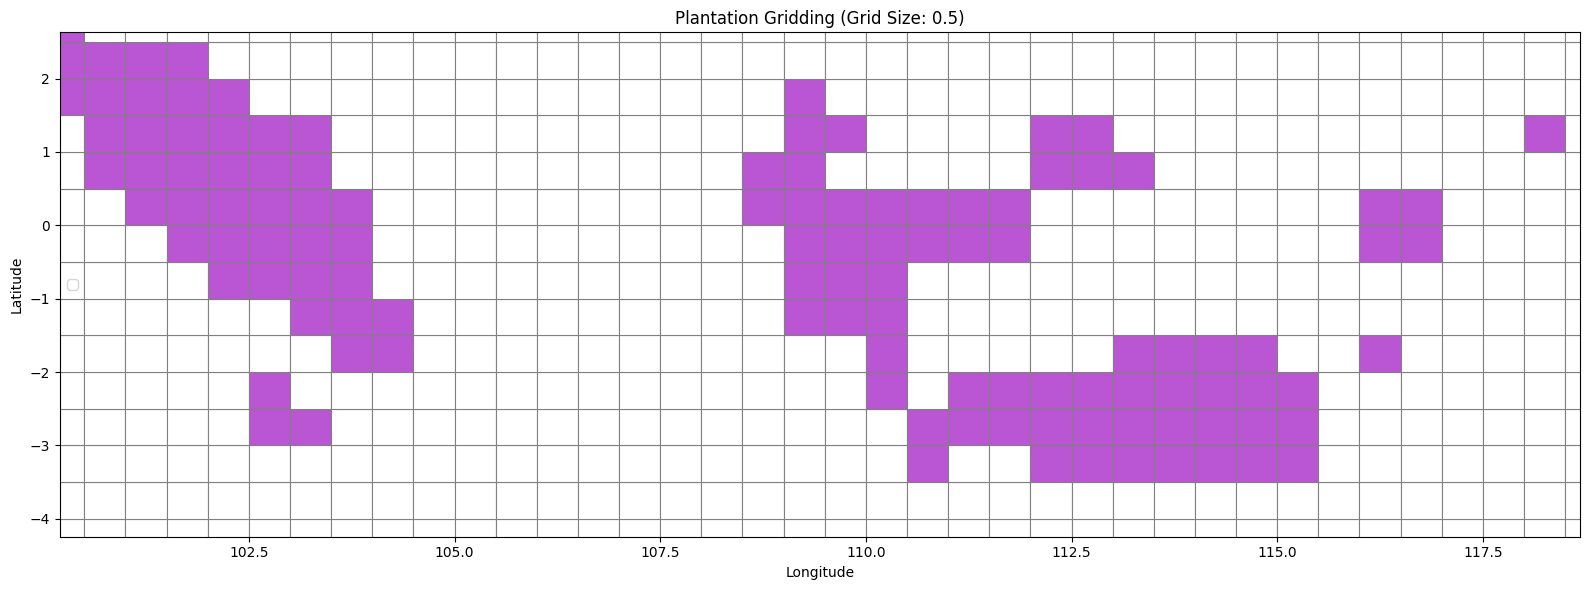

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

grid_size = 0.5

# Buat kolom penanda grid
data['lon_bin'] = (data['Longitude'] // grid_size) * grid_size
data['lat_bin'] = (data['Latitude'] // grid_size) * grid_size
data['grid_id'] = data['lon_bin'].astype(str) + "_" + data['lat_bin'].astype(str)

# Hitung jumlah kebakaran per grid
grid_fire = data.groupby(['lon_bin', 'lat_bin'])['Plantation'].sum().reset_index()
grid_fire.rename(columns={'Plantation': 'forest_count'}, inplace=True)

# -------------------------------
# BUAT GRID LENGKAP (semua kotak!)
# -------------------------------
lon_range = np.arange(data['Longitude'].min() // grid_size * grid_size,
                      data['Longitude'].max() // grid_size * grid_size + grid_size,
                      grid_size)

lat_range = np.arange(data['Latitude'].min() // grid_size * grid_size,
                      data['Latitude'].max() // grid_size * grid_size + grid_size,
                      grid_size)

# Buat kombinasi semua grid yang mungkin
all_grids = pd.MultiIndex.from_product([lon_range, lat_range], names=['lon_bin', 'lat_bin']).to_frame(index=False)

# Gabungkan dengan jumlah titik api
all_grids = pd.merge(all_grids, grid_fire, on=['lon_bin', 'lat_bin'], how='left')
all_grids['forest_count'] = all_grids['forest_count'].fillna(0)

# -------------------------------
# VISUALISASI: semua grid + warna
# -------------------------------
plt.figure(figsize=(16, 6))

for _, row in all_grids.iterrows():
    x = row['lon_bin']
    y = row['lat_bin']
    count = row['forest_count']

    # Jika ada titik api, beri warna berbeda
    if count > 0:
        color = 'mediumorchid'
    else:
        color = 'white'

    plt.gca().add_patch(plt.Rectangle(
        (x, y), grid_size, grid_size,
        edgecolor='grey',
        facecolor=color,
        linewidth=0.8
    ))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Plantation Gridding (Grid Size: {grid_size})')
plt.grid(False)
plt.legend()
plt.xlim(data['Longitude'].min() - 0.1, data['Longitude'].max() + 0.1)
plt.ylim(data['Latitude'].min() - 0.1, data['Latitude'].max() + 0.1)
plt.tight_layout()
plt.show()

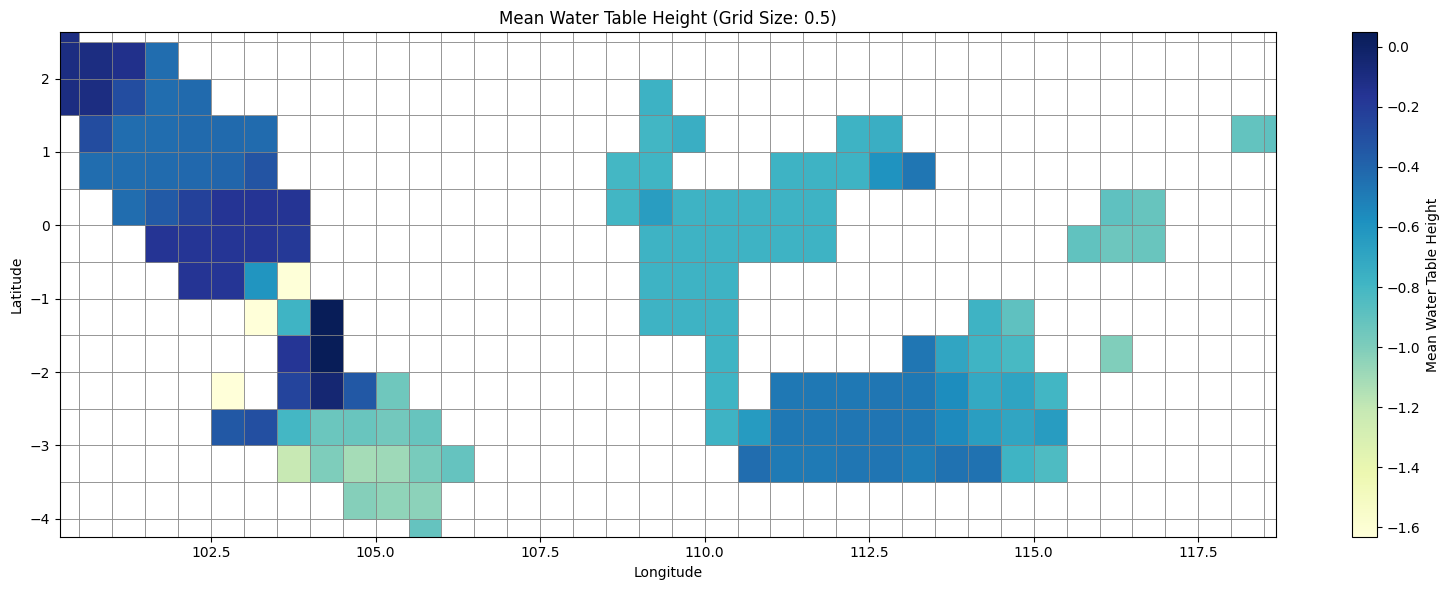

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Misalkan data sudah ada
# data = pd.read_excel('data_SMOTE.xlsx')
grid_size = 0.5

# Buat kolom grid
data['lon_bin'] = (data['Longitude'] // grid_size) * grid_size
data['lat_bin'] = (data['Latitude'] // grid_size) * grid_size

# Hitung mean Water Table Height per grid
grid_mean = data.groupby(['lon_bin', 'lat_bin'])['Water Table Height'].mean().reset_index()
grid_mean.rename(columns={'Water Table Height': 'mean_wth'}, inplace=True)

# Buat grid lengkap
lon_range = np.arange(
    data['Longitude'].min() // grid_size * grid_size,
    data['Longitude'].max() // grid_size * grid_size + grid_size,
    grid_size
)
lat_range = np.arange(
    data['Latitude'].min() // grid_size * grid_size,
    data['Latitude'].max() // grid_size * grid_size + grid_size,
    grid_size
)
all_grids = pd.MultiIndex.from_product(
    [lon_range, lat_range], names=['lon_bin', 'lat_bin']
).to_frame(index=False)

# Gabung agar semua grid terisi
all_grids = pd.merge(all_grids, grid_mean, on=['lon_bin', 'lat_bin'], how='left')
all_grids['mean_wth'] = all_grids['mean_wth'].fillna(np.nan)

# Buat plot
fig, ax = plt.subplots(figsize=(16, 6))

# Plot kotak per grid
cmap = plt.cm.YlGnBu  # contoh colormap
vmin = all_grids['mean_wth'].min(skipna=True)
vmax = all_grids['mean_wth'].max(skipna=True)

for _, row in all_grids.iterrows():
    x = row['lon_bin']
    y = row['lat_bin']
    value = row['mean_wth']
    color = cmap((value - vmin) / (vmax - vmin)) if pd.notnull(value) else (1,1,1,1)  # putih bila NaN

    ax.add_patch(plt.Rectangle(
        (x, y), grid_size, grid_size,
        edgecolor='grey',
        facecolor=color,
        linewidth=0.5
    ))

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label='Mean Water Table Height')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'Mean Water Table Height (Grid Size: {grid_size})')
ax.set_xlim(data['Longitude'].min() - 0.1, data['Longitude'].max() + 0.1)
ax.set_ylim(data['Latitude'].min() - 0.1, data['Latitude'].max() + 0.1)
plt.tight_layout()
plt.show()

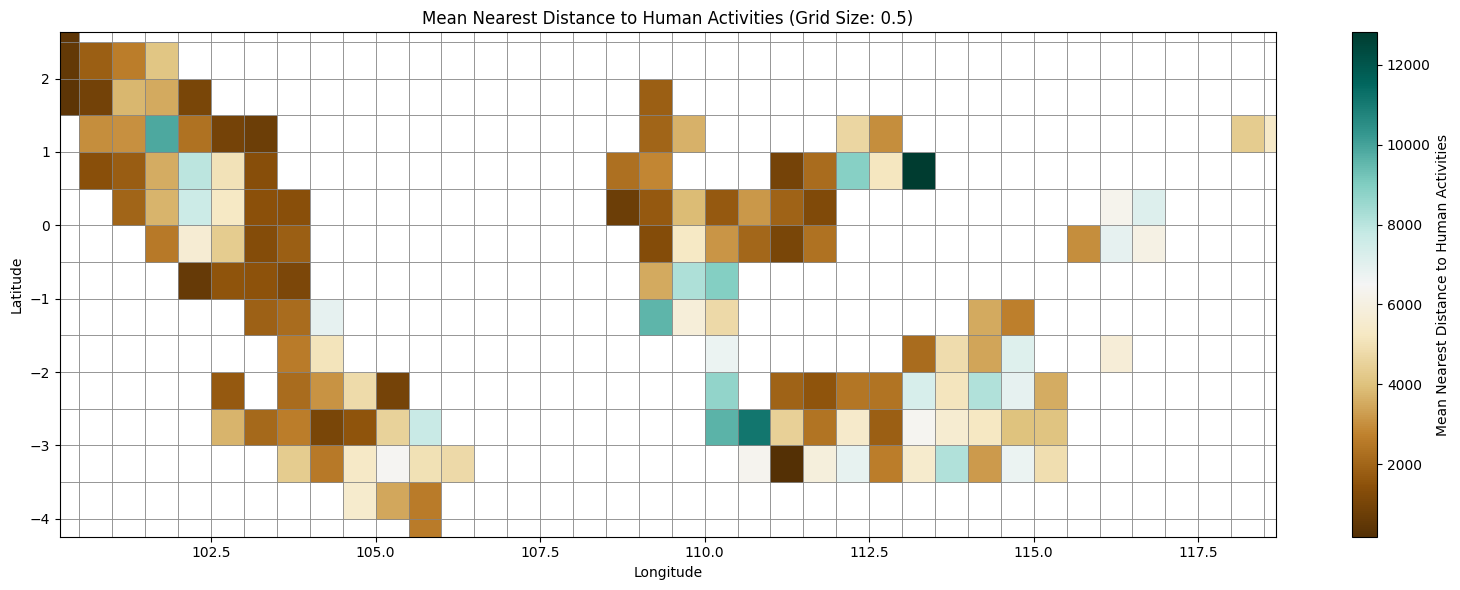

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Misalkan data sudah ada
# data = pd.read_excel('data_SMOTE.xlsx')
grid_size = 0.5

# Buat kolom grid
data['lon_bin'] = (data['Longitude'] // grid_size) * grid_size
data['lat_bin'] = (data['Latitude'] // grid_size) * grid_size

# Hitung mean Water Table Height per grid
grid_mean = data.groupby(['lon_bin', 'lat_bin'])['Nearest Distance to Human Activities'].mean().reset_index()
grid_mean.rename(columns={'Nearest Distance to Human Activities': 'mean_wth'}, inplace=True)

# Buat grid lengkap
lon_range = np.arange(
    data['Longitude'].min() // grid_size * grid_size,
    data['Longitude'].max() // grid_size * grid_size + grid_size,
    grid_size
)
lat_range = np.arange(
    data['Latitude'].min() // grid_size * grid_size,
    data['Latitude'].max() // grid_size * grid_size + grid_size,
    grid_size
)
all_grids = pd.MultiIndex.from_product(
    [lon_range, lat_range], names=['lon_bin', 'lat_bin']
).to_frame(index=False)

# Gabung agar semua grid terisi
all_grids = pd.merge(all_grids, grid_mean, on=['lon_bin', 'lat_bin'], how='left')
all_grids['mean_wth'] = all_grids['mean_wth'].fillna(np.nan)

# Buat plot
fig, ax = plt.subplots(figsize=(16, 6))

# Plot kotak per grid
cmap = plt.cm.BrBG  # contoh colormap
vmin = all_grids['mean_wth'].min(skipna=True)
vmax = all_grids['mean_wth'].max(skipna=True)

for _, row in all_grids.iterrows():
    x = row['lon_bin']
    y = row['lat_bin']
    value = row['mean_wth']
    color = cmap((value - vmin) / (vmax - vmin)) if pd.notnull(value) else (1,1,1,1)  # putih bila NaN

    ax.add_patch(plt.Rectangle(
        (x, y), grid_size, grid_size,
        edgecolor='grey',
        facecolor=color,
        linewidth=0.5
    ))

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label='Mean Nearest Distance to Human Activities')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'Mean Nearest Distance to Human Activities (Grid Size: {grid_size})')
ax.set_xlim(data['Longitude'].min() - 0.1, data['Longitude'].max() + 0.1)
ax.set_ylim(data['Latitude'].min() - 0.1, data['Latitude'].max() + 0.1)
plt.tight_layout()
plt.show()

In [ ]:
# 3. Statistika deskriptif

statdes = data[['Water Table Height', 'Nearest Distance to Human Activities', 'Longitude', 'Latitude']].describe().round(3)
statdes.to_excel("statdes.xlsx")
statdes

,Water Table Height,Nearest Distance to Human Activities,Longitude,Latitude
count,123516.000,123516.000,123516.000,123516.000
mean,-0.528,4550.606,107.405,-0.902
std,0.341,4165.126,5.005,1.643
min,-1.887,1.860,100.301,-4.145
25%,-0.774,1370.809,102.752,-2.487
50%,-0.484,3226.123,105.491,-0.766
75%,-0.275,6581.507,112.599,0.486
max,0.228,25611.003,118.581,2.531


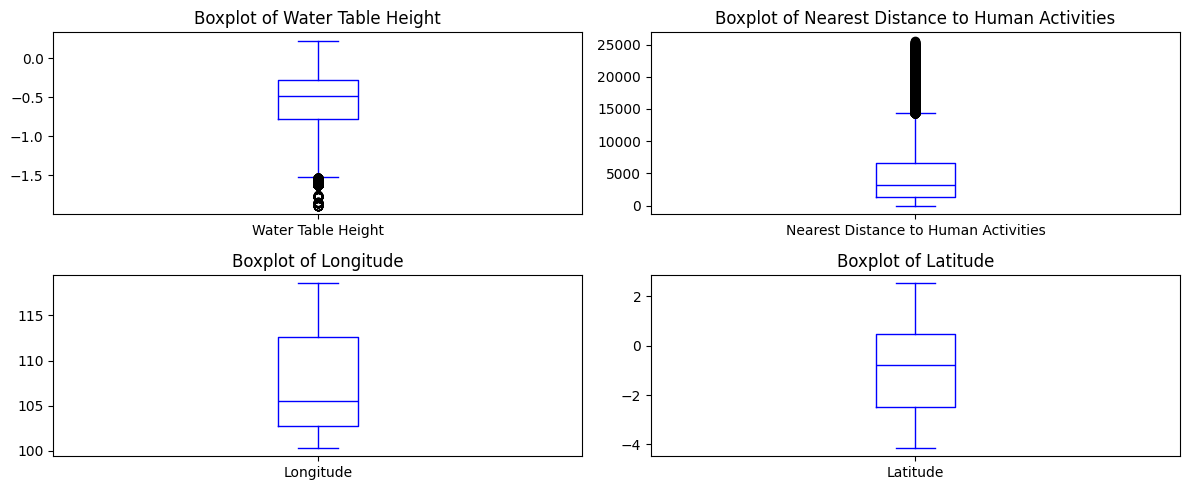

In [ ]:
# 4. Membuat boxplot

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Fitur yang digunakan
histo = data[['Water Table Height', 'Nearest Distance to Human Activities', 'Longitude', 'Latitude']]

fig, axes = plt.subplots(2, 2, figsize=(12, 5))

axes = axes.flatten()

# Visualisasi
for i, column in enumerate(histo.columns):
    histo.boxplot(column=column, ax=axes[i],
                  color='blue',
                  grid=False)
    axes[i].set_title(f"Boxplot of {column}")


plt.tight_layout()
plt.show()

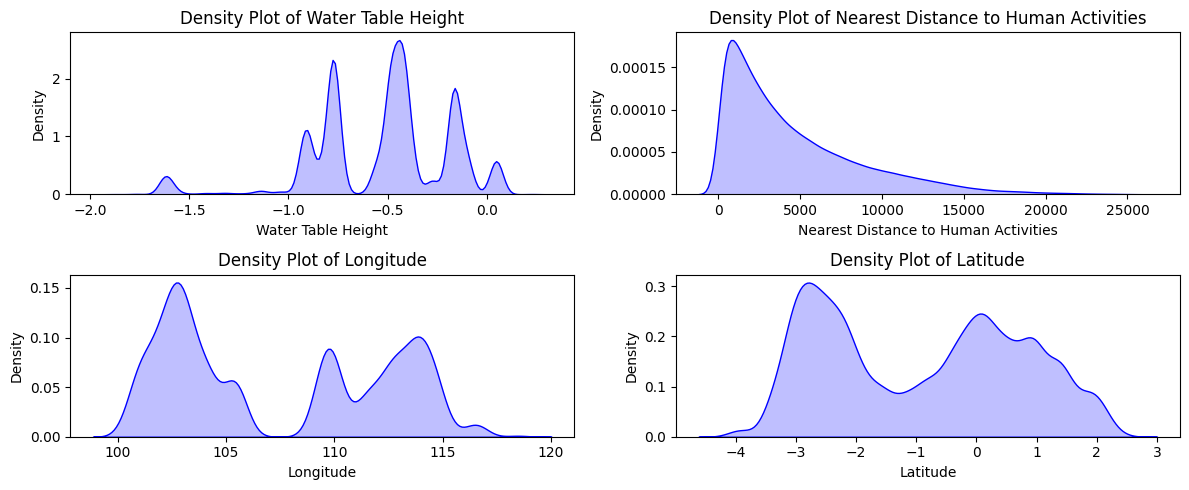

In [ ]:
# 5. Density Plot

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Fitur yang digunakan
density_columns = ['Water Table Height', 'Nearest Distance to Human Activities', 'Longitude', 'Latitude']

fig, axes = plt.subplots(2, 2, figsize=(12, 5))

axes = axes.flatten()

# Visualisasi
for i, column in enumerate(density_columns):
    sns.kdeplot(data[column], ax=axes[i], fill=True, color='blue')
    axes[i].set_title(f"Density Plot of {column}") # Set title for the individual axis


plt.tight_layout()
plt.show()

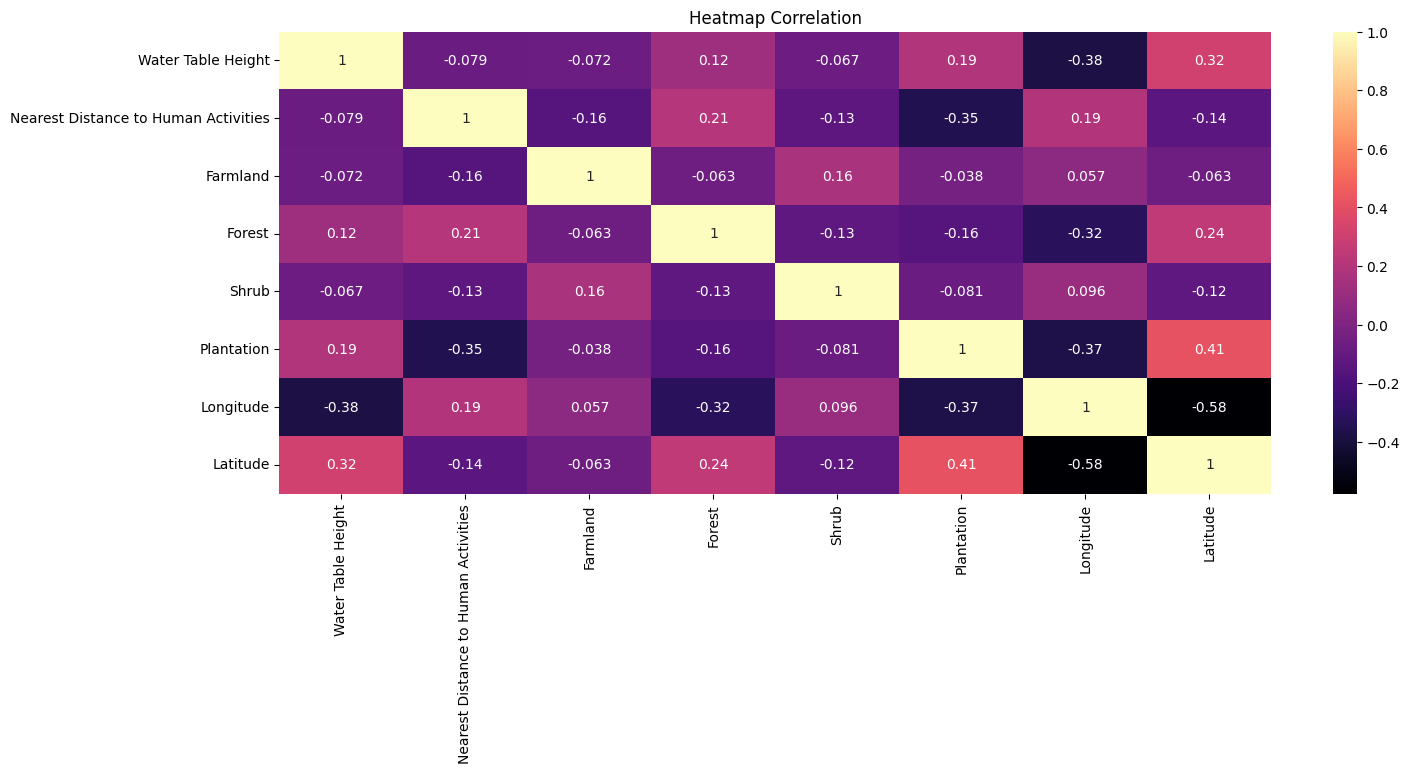

In [ ]:
# 6. Heatmap korelasi

import matplotlib.pyplot as plt
import seaborn as sns

features = ['Water Table Height', 'Nearest Distance to Human Activities', 'Farmland', 'Forest', 'Shrub', 'Plantation', 'Longitude', 'Latitude']

plt.figure(figsize=(16, 6))

# Menghitung korelasi
correlation_matrix = data[features].corr()

# Visualisasi
sns.heatmap(correlation_matrix, annot=True, cmap='magma')
plt.title('Heatmap Correlation')
plt.show()

# **2. Data Pre-processing**

In [ ]:
# 1. Input data
import pandas as pd

data2 = pd.read_csv("data pre.csv")
data2.to_excel("datafix.xlsx")
data2

,Water Table Height,Nearest Distance to Human Activities,Farmland,Forest,Shrub,Plantation,Longitude,Latitude,Fire Occurance,sqrt_distance_to_human_activities
0,-0.101642,6.737520,0,0,0,1,100.301319,2.503828,0,28.718390
1,-0.101642,6.181419,0,0,0,1,100.301319,2.494819,0,24.678296
2,-0.101642,6.791000,0,0,0,1,100.301319,2.485810,0,29.120801
3,-0.101642,6.025165,0,0,0,1,100.301319,2.476801,0,23.590942
4,-0.101642,5.854584,0,0,0,1,100.301319,2.467792,0,22.428126
...,...,...,...,...,...,...,...,...,...,...
123511,-0.892458,9.120546,0,0,0,0,118.571571,1.359685,0,48.936927
123512,-0.892458,8.607085,0,0,0,0,118.571571,1.350676,0,44.192312
123513,-0.892458,7.794307,0,0,0,0,118.571571,1.341667,0,37.113205
123514,-0.892458,7.381198,0,0,0,0,118.580580,1.350676,0,33.721222


In [ ]:
# Data fix

datafix = pd.read_excel("datafix.xlsx")
datafix

,Water Table Height,Nearest Distance to Human Activities,Farmland,Forest,Shrub,Plantation,Longitude,Latitude,Fire Occurance
0,-0.101642,6.737520,0,0,0,1,100.301319,2.503828,0
1,-0.101642,6.181419,0,0,0,1,100.301319,2.494819,0
2,-0.101642,6.791000,0,0,0,1,100.301319,2.485810,0
3,-0.101642,6.025165,0,0,0,1,100.301319,2.476801,0
4,-0.101642,5.854584,0,0,0,1,100.301319,2.467792,0
...,...,...,...,...,...,...,...,...,...
123511,-0.892458,9.120546,0,0,0,0,118.571571,1.359685,0
123512,-0.892458,8.607085,0,0,0,0,118.571571,1.350676,0
123513,-0.892458,7.794307,0,0,0,0,118.571571,1.341667,0
123514,-0.892458,7.381198,0,0,0,0,118.580580,1.350676,0


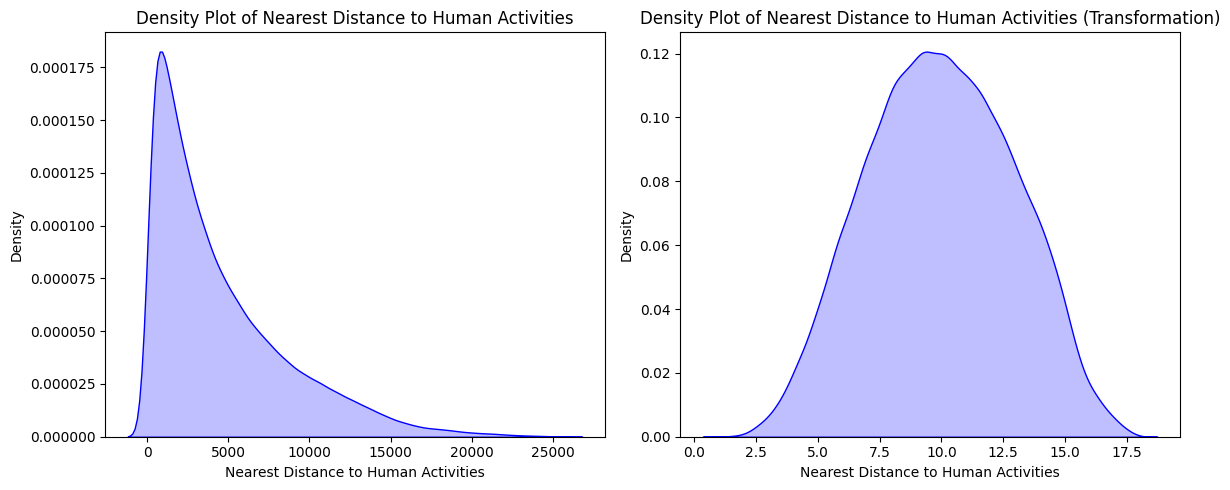

In [ ]:
# 2. Visualisasi hasil transformasi

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Membuat figure dan axes dengan ukuran yang sesuai
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Fitur yang digunakan
density_columns = ['Nearest Distance to Human Activities']

# Visualisasi
sns.kdeplot(datafix[density_columns[0]].dropna(), ax=axes[1], fill=True, color='blue')
sns.kdeplot(data[density_columns[0]].dropna(), ax=axes[0], fill=True, color='blue')

# Judul grafik
axes[1].set_title(f"Density Plot of {density_columns[0]} (Transformation)")
axes[1].set_xlabel(density_columns[0])
axes[1].set_ylabel("Density")

axes[0].set_title(f"Density Plot of {density_columns[0]}")
axes[0].set_xlabel(density_columns[0])
axes[0].set_ylabel("Density")


plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter

# Misalnya data sudah dibaca sebagai 'datafix'
X = datafix.drop(columns="Fire Occurance")
y = datafix["Fire Occurance"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Misalnya fitur kategorikal adalah:
categorical_cols = ["Farmland", "Forest", "Shrub", "Plantation"]
categorical_features = [X_train.columns.get_loc(col) for col in categorical_cols]

# Terapkan SMOTENC hanya ke data training
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

# Cek distribusi
print("Sebelum SMOTE:", Counter(y_train))
print("Sesudah SMOTE:", Counter(y_train_resampled))

Sebelum SMOTE: Counter({0: 91969, 1: 6843})
Sesudah SMOTE: Counter({0: 91969, 1: 91969})


In [ ]:
df_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
df_resampled["Fire Occurance"] = y_train_resampled
df_resampled.to_excel("train_data_resampled.xlsx", index=False)

In [ ]:
df_test = pd.DataFrame(X_test, columns=X_train.columns)
df_test["Fire Occurance"] = y_test
df_test.to_excel("test_data.xlsx", index=False)

In [ ]:
df_train = pd.DataFrame(X_train, columns=X_train.columns)
df_train["Fire Occurance"] = y_train
df_train.to_excel("train_data.xlsx", index=False)

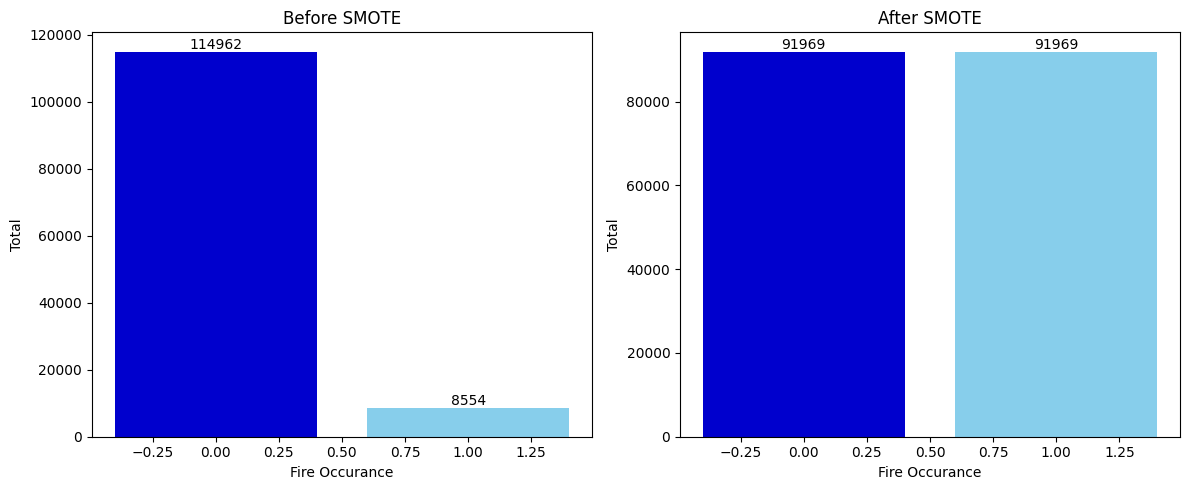

In [ ]:
# 4. Visualisasi distribusi SMOTE

import matplotlib.pyplot as plt
from collections import Counter

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

colors = ['mediumblue', 'skyblue']

# Sebelum SMOTE
# 'y' is available from the global variables, representing the original target
counter_before = Counter(y)
labels_before = list(counter_before.keys())
values_before = list(counter_before.values())

axes[0].bar(labels_before, values_before, color=colors[:len(labels_before)])
axes[0].set_title("Before SMOTE")
axes[0].set_xlabel("Fire Occurance")
axes[0].set_ylabel("Total")
for i, (label, count) in enumerate(zip(labels_before, values_before)):
    axes[0].text(label, count + 1, str(count), ha='center', va='bottom', fontsize=10)

# Setelah SMOTE (menggunakan y_train_resampled dari cell 6)
# Assuming cell 6 has been run and y_train_resampled is in the environment
counter_after = Counter(y_train_resampled)
labels_after = list(counter_after.keys())
values_after = list(counter_after.values())

axes[1].bar(labels_after, values_after, color=colors[:len(labels_after)])
axes[1].set_title("After SMOTE")
axes[1].set_xlabel("Fire Occurance")
axes[1].set_ylabel("Total")
for i, (label, count) in enumerate(zip(labels_after, values_after)):
    axes[1].text(label, count + 1, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# 6. Reduksi dimensi (tanpa SMOTE)

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Baca data
df = pd.read_excel("datafix.xlsx")

# Drop kolom fire_occurance
df = df.drop(columns=['Fire Occurance'])

# Ambil hanya kolom numerik
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Standarisasi
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Lihat explained variance ratio
expl_var_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio per PC:\n", expl_var_ratio)

# Buat dataframe komponen utama
pc_columns = [f'PC{i+1}' for i in range(pca_result.shape[1])]
df_pca = pd.DataFrame(pca_result, columns=pc_columns)

df_pca.to_excel("df_pca_before.xlsx", index=False)

Explained Variance Ratio per PC:
 [0.29614961 0.19420312 0.13455027 0.10678549 0.09497578 0.07129765
 0.05394734 0.04809075]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Import the standard SMOTE for numerical data
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter

datapca = pd.read_excel("datapca.xlsx")

# Misalnya data sudah dibaca sebagai 'datafix'
X = datapca.drop(columns="Fire Occurance")
y = datapca["Fire Occurance"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Terapkan SMOTE (tanpa NC) karena data setelah PCA dianggap numerik
# Remove the categorical_features argument
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Cek distribusi
print("Sebelum SMOTE:", Counter(y_train))
print("Sesudah SMOTE:", Counter(y_train_resampled))

Sebelum SMOTE: Counter({0: 91969, 1: 6843})
Sesudah SMOTE: Counter({0: 91969, 1: 91969})


In [ ]:
df_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
df_resampled["Fire Occurance"] = y_train_resampled
df_resampled.to_excel("train_datapca_resampled.xlsx", index=False)

In [ ]:
df_test = pd.DataFrame(X_test, columns=X_train.columns)
df_test["Fire Occurance"] = y_test
df_test.to_excel("test_datapca.xlsx", index=False)

In [ ]:
df_train = pd.DataFrame(X_train, columns=X_train.columns)
df_train["Fire Occurance"] = y_train
df_train.to_excel("train_datapca.xlsx", index=False)

# **3. Data Modeling**

In [ ]:
# 1. Import data

import pandas as pd

datatrain = pd.read_excel("train_data.xlsx")
datatrain

,Water Table Height,Nearest Distance to Human Activities,Farmland,Forest,Shrub,Plantation,Longitude,Latitude,Fire Occurance
0,-0.416731,12.017808,0,1,0,0,102.418434,0.729055,0
1,-0.392000,4.281631,0,0,1,0,112.904910,-2.487158,1
2,-0.892458,12.631792,0,0,1,0,116.499501,0.053380,0
3,-0.774022,10.851107,0,0,1,1,110.076084,-1.793465,0
4,-0.416731,12.289815,0,0,0,1,102.022038,1.287613,0
...,...,...,...,...,...,...,...,...,...
98807,-0.416731,7.732042,0,0,0,1,102.130146,1.008334,0
98808,-0.484084,10.164234,0,0,1,0,111.823830,-3.216887,0
98809,-1.623431,6.178937,0,0,0,1,102.607623,-2.054726,0
98810,-0.165048,6.920839,0,0,1,1,103.256271,-0.126800,0


In [ ]:
# 1. Import data

import pandas as pd

datatest = pd.read_excel("test_data.xlsx")
datatest

,Water Table Height,Nearest Distance to Human Activities,Farmland,Forest,Shrub,Plantation,Longitude,Latitude,Fire Occurance
0,-0.373777,10.041883,0,0,1,0,113.976981,-2.901572,0
1,-0.165048,15.804696,0,1,0,1,102.328344,0.431758,0
2,-0.484084,6.864852,0,0,0,1,112.931937,-2.901572,0
3,-0.433741,8.414404,0,1,0,0,101.040057,1.332658,0
4,-0.165048,12.973183,0,0,0,1,102.643659,0.179506,0
...,...,...,...,...,...,...,...,...,...
24699,-0.416731,11.129609,0,0,1,0,103.022037,0.936262,0
24700,-0.165048,7.155903,0,0,1,1,103.301316,-0.595268,0
24701,-0.774022,8.235307,0,0,1,0,110.193201,-1.766438,0
24702,-0.774969,11.378370,0,0,0,0,114.427431,-1.838510,0


In [ ]:
# 1. Import library (FIX)
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 2. Baca data training dan data testing dari Excel
train_data = pd.read_excel("train_data.xlsx")
test_data = pd.read_excel("test_data.xlsx")

# 3. Pisahkan fitur dan target
X_train = train_data.drop(columns="Fire Occurance")
y_train = train_data["Fire Occurance"]

X_test = test_data.drop(columns="Fire Occurance")
y_test = test_data["Fire Occurance"]

# 4. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# 5. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 6. Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# 7. K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# === Evaluasi ===
print("\n=== Logistic Regression ===")
print("Akurasi:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("\n=== Random Forest ===")
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("\n=== Naive Bayes ===")
print("Akurasi:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

print("\n=== K-Nearest Neighbors ===")
print("Akurasi:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


=== Logistic Regression ===
Akurasi: 0.9328044041450777
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     22993
           1       0.82      0.04      0.07      1711

    accuracy                           0.93     24704
   macro avg       0.88      0.52      0.52     24704
weighted avg       0.93      0.93      0.90     24704


=== Random Forest ===
Akurasi: 0.9971259715025906
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22993
           1       1.00      0.96      0.98      1711

    accuracy                           1.00     24704
   macro avg       1.00      0.98      0.99     24704
weighted avg       1.00      1.00      1.00     24704


=== Naive Bayes ===
Akurasi: 0.9126862046632125
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     22993
           1       0.35      0.32      0.33      1711

    accuracy             

In [ ]:
from sklearn.model_selection import cross_val_score

# Lakukan cross-validation pada data training saja (X_train, y_train)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

print("\n=== CROSS VALIDATION (5-FOLD) ===")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}:")
    print(f"  Akurasi per fold : {scores}")
    print(f"  Rata-rata akurasi: {scores.mean():.4f}\n")


=== CROSS VALIDATION (5-FOLD) ===
Logistic Regression:
  Akurasi per fold : [0.93290492 0.93310732 0.93376177 0.93315454 0.93325574]
  Rata-rata akurasi: 0.9332

Random Forest:
  Akurasi per fold : [0.99752062 0.99716642 0.99681206 0.99741929 0.99691327]
  Rata-rata akurasi: 0.9972

Naive Bayes:
  Akurasi per fold : [0.91453727 0.91413247 0.91099079 0.91341969 0.9135715 ]
  Rata-rata akurasi: 0.9133

K-Nearest Neighbors:
  Akurasi per fold : [0.95248697 0.95182918 0.95035928 0.95223156 0.95035928]
  Rata-rata akurasi: 0.9515



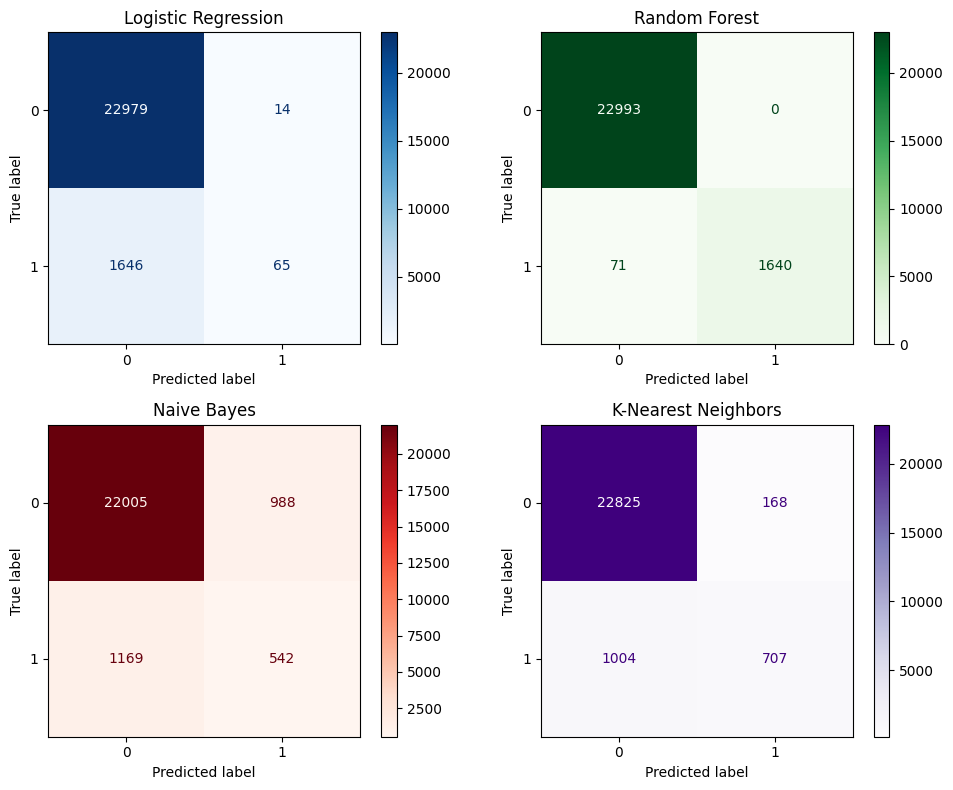

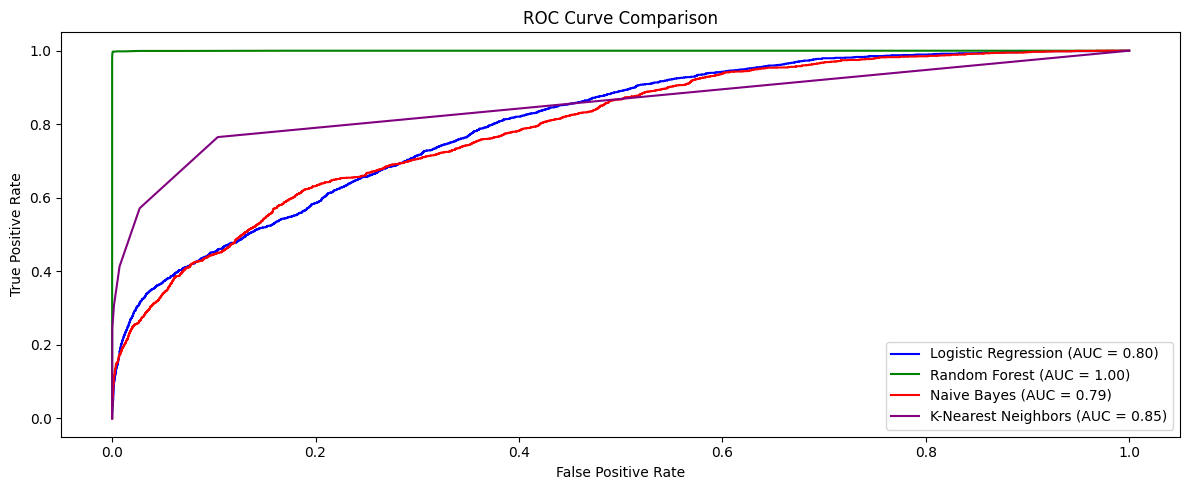

In [ ]:
# 9. Visualisasi Confusion Matrix (FIX)
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, ax=ax[0, 0], cmap='Blues')
ax[0, 0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, ax=ax[0, 1], cmap='Greens')
ax[0, 1].set_title("Random Forest")

ConfusionMatrixDisplay.from_estimator(nb_model, X_test, y_test, ax=ax[1, 0], cmap='Reds')
ax[1, 0].set_title("Naive Bayes")

ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test, ax=ax[1, 1], cmap='Purples')
ax[1, 1].set_title("K-Nearest Neighbors")

plt.tight_layout()
plt.show()

# ROC
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(12, 5))

# Logistic Regression
y_score_lr = lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_score_lr):.2f})', color = 'blue')

# Random Forest
y_score_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_score_rf):.2f})', color = 'green')

# Naive Bayes
y_score_nb = nb_model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_score_nb)
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_score(y_test, y_score_nb):.2f})', color = 'red')

# K-Nearest Neighbors
y_score_knn = knn_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {roc_auc_score(y_test, y_score_knn):.2f})', color = 'purple')

# Format plot
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# 1. Import library (FIX)
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# 2. Baca data training dan data testing dari Excel
train_data = pd.read_excel("train_data.xlsx")
test_data = pd.read_excel("test_data.xlsx")

# 3. Pisahkan fitur dan target
X_train = train_data.drop(columns="Fire Occurance")
y_train = train_data["Fire Occurance"]

X_test = test_data.drop(columns="Fire Occurance")
y_test = test_data["Fire Occurance"]

# 4. Standarisasi sebelum PCA (wajib untuk PCA agar skala fitur seragam)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. PCA: gunakan 5 Principal Components
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 6. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_pca, y_train)
y_pred_lr = lr_model.predict(X_test_pca)

# 7. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)
y_pred_rf = rf_model.predict(X_test_pca)

# 8. Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_pca, y_train)
y_pred_nb = nb_model.predict(X_test_pca)

# 9. K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_pca, y_train)
y_pred_knn = knn_model.predict(X_test_pca)

# === Evaluasi ===
print("\n=== Logistic Regression ===")
print("Akurasi:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("\n=== Random Forest ===")
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("\n=== Naive Bayes ===")
print("Akurasi:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

print("\n=== K-Nearest Neighbors ===")
print("Akurasi:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


=== Logistic Regression ===
Akurasi: 0.9330877590673575
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     22993
           1       0.85      0.04      0.08      1711

    accuracy                           0.93     24704
   macro avg       0.89      0.52      0.52     24704
weighted avg       0.93      0.93      0.90     24704


=== Random Forest ===
Akurasi: 0.9804080310880829
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     22993
           1       0.96      0.75      0.84      1711

    accuracy                           0.98     24704
   macro avg       0.97      0.87      0.92     24704
weighted avg       0.98      0.98      0.98     24704


=== Naive Bayes ===
Akurasi: 0.920458225388601
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     22993
           1       0.33      0.14      0.20      1711

    accuracy              

In [ ]:
data_train_pca = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
data_train_pca["Fire Occurance"] = y_train
data_train_pca

,PC1,PC2,PC3,PC4,PC5,Fire Occurance
0,-1.065887,2.172428,0.729959,-0.263718,-0.226449,0
1,1.018315,-1.615958,0.204131,1.386990,0.271554,1
2,1.903480,-0.119681,0.036571,0.881494,-0.981144,0
3,0.646000,-1.062736,-0.478524,0.896380,-1.001341,0
4,-1.723449,0.353080,-1.030915,-0.173446,-0.102691,0
...,...,...,...,...,...,...
98807,-2.036422,-0.527723,-1.028380,-0.287086,-0.154992,0
98808,1.768117,-0.537168,0.172675,1.467009,0.249449,0
98809,0.168827,-1.308548,-1.414358,-1.699657,-2.570396,0
98810,-1.639478,-1.435536,-0.021766,1.494862,-0.066046,0


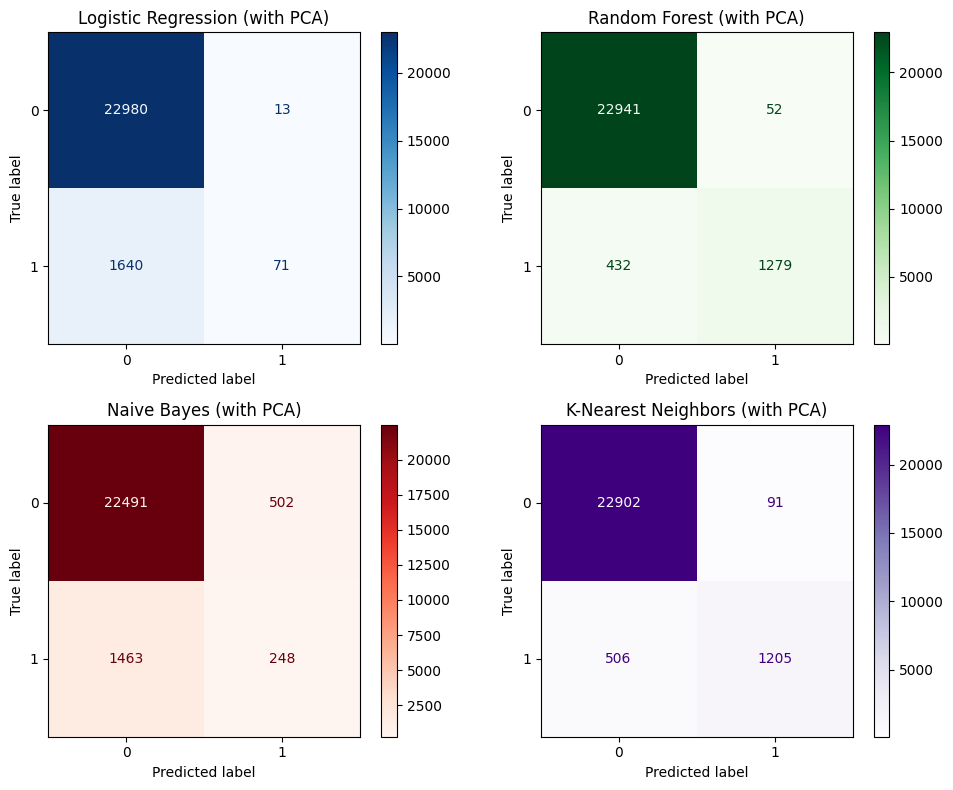

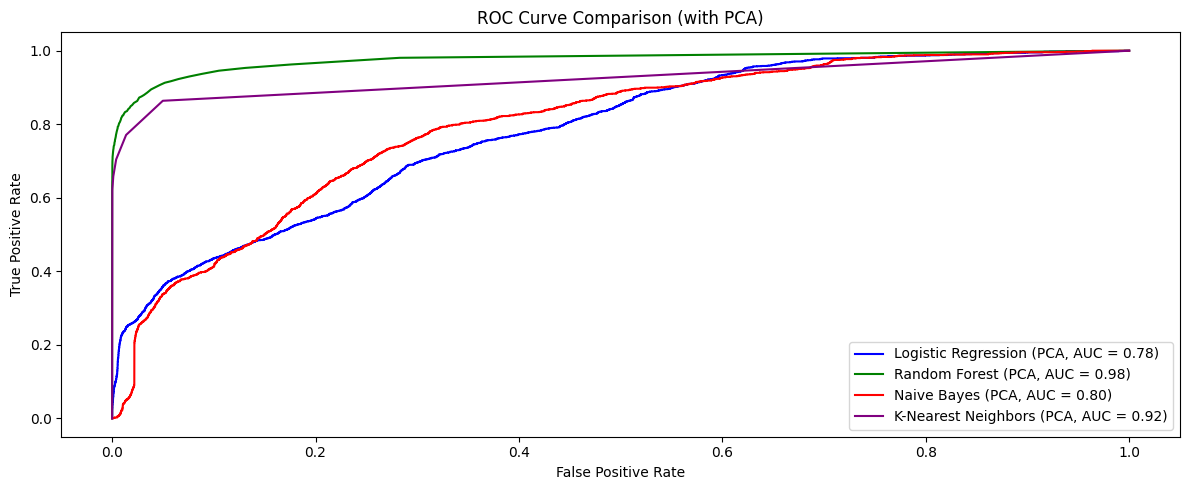

In [ ]:
# 9. Visualisasi Confusion Matrix (FIX)
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Use X_test_pca which was created in Cell 3 and has 5 features
ConfusionMatrixDisplay.from_estimator(lr_model, X_test_pca, y_test, ax=ax[0, 0], cmap='Blues')
ax[0, 0].set_title("Logistic Regression (with PCA)") # Add title context

# Use X_test_pca
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_pca, y_test, ax=ax[0, 1], cmap='Greens')
ax[0, 1].set_title("Random Forest (with PCA)") # Add title context

# Use X_test_pca
ConfusionMatrixDisplay.from_estimator(nb_model, X_test_pca, y_test, ax=ax[1, 0], cmap='Reds')
ax[1, 0].set_title("Naive Bayes (with PCA)") # Add title context

# Use X_test_pca
ConfusionMatrixDisplay.from_estimator(knn_model, X_test_pca, y_test, ax=ax[1, 1], cmap='Purples')
ax[1, 1].set_title("K-Nearest Neighbors (with PCA)") # Add title context


plt.tight_layout()
plt.show()

# ROC
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(12, 5))

# Logistic Regression
# Use X_test_pca for prediction
y_score_lr = lr_model.predict_proba(X_test_pca)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (PCA, AUC = {roc_auc_score(y_test, y_score_lr):.2f})', color = 'blue') # Add label context

# Random Forest
# Use X_test_pca for prediction
y_score_rf = rf_model.predict_proba(X_test_pca)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (PCA, AUC = {roc_auc_score(y_test, y_score_rf):.2f})', color = 'green') # Add label context

# Naive Bayes
# Use X_test_pca for prediction
y_score_nb = nb_model.predict_proba(X_test_pca)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_score_nb)
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (PCA, AUC = {roc_auc_score(y_test, y_score_nb):.2f})', color = 'red') # Add label context

# K-Nearest Neighbors
# Use X_test_pca for prediction
y_score_knn = knn_model.predict_proba(X_test_pca)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (PCA, AUC = {roc_auc_score(y_test, y_score_knn):.2f})', color = 'purple') # Add label context

# Format plot
plt.title('ROC Curve Comparison (with PCA)') # Add title context
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# 1. Import library (FIX)
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 2. Baca data training dan data testing dari Excel
train_data = pd.read_excel("train_data_resampled.xlsx")
test_data = pd.read_excel("test_data.xlsx")

# 3. Pisahkan fitur dan target
X_train = train_data.drop(columns="Fire Occurance")
y_train = train_data["Fire Occurance"]

X_test = test_data.drop(columns="Fire Occurance")
y_test = test_data["Fire Occurance"]

# 4. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# 5. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 6. Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# 7. K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# === Evaluasi ===
print("\n=== Logistic Regression ===")
print("Akurasi:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("\n=== Random Forest ===")
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("\n=== Naive Bayes ===")
print("Akurasi:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

print("\n=== K-Nearest Neighbors ===")
print("Akurasi:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


=== Logistic Regression ===
Akurasi: 0.6921146373056994
              precision    recall  f1-score   support

           0       0.98      0.69      0.81     22993
           1       0.15      0.77      0.26      1711

    accuracy                           0.69     24704
   macro avg       0.57      0.73      0.53     24704
weighted avg       0.92      0.69      0.77     24704


=== Random Forest ===
Akurasi: 0.9993523316062176
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22993
           1       1.00      0.99      1.00      1711

    accuracy                           1.00     24704
   macro avg       1.00      1.00      1.00     24704
weighted avg       1.00      1.00      1.00     24704


=== Naive Bayes ===
Akurasi: 0.6228545984455959
              precision    recall  f1-score   support

           0       0.97      0.61      0.75     22993
           1       0.13      0.78      0.22      1711

    accuracy             

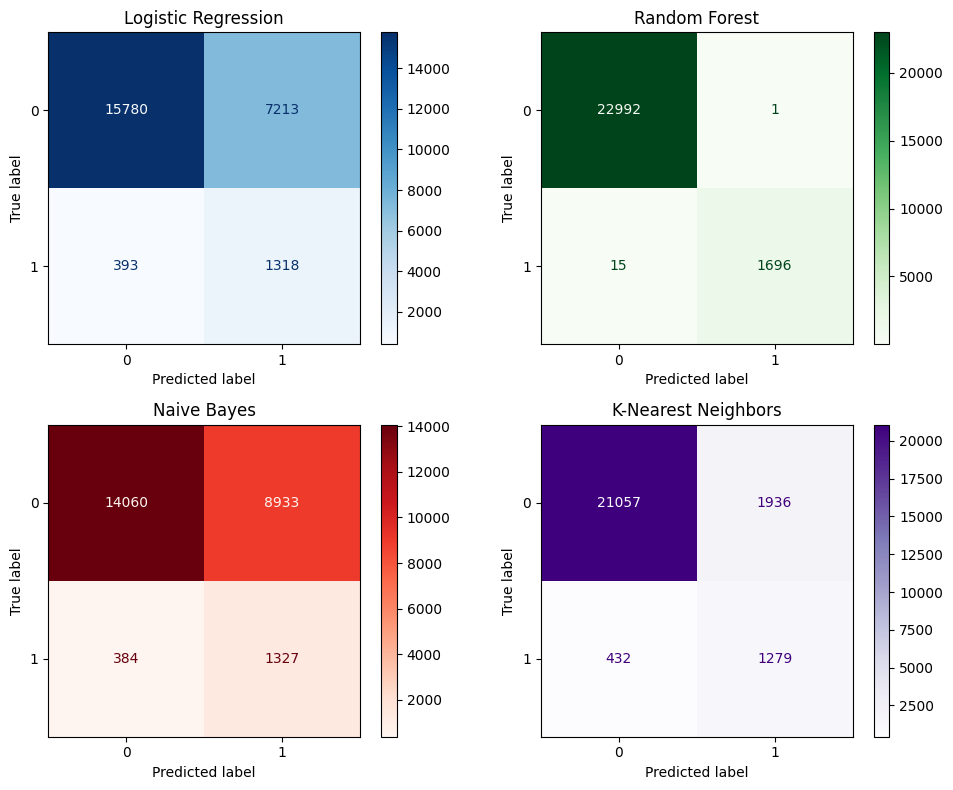

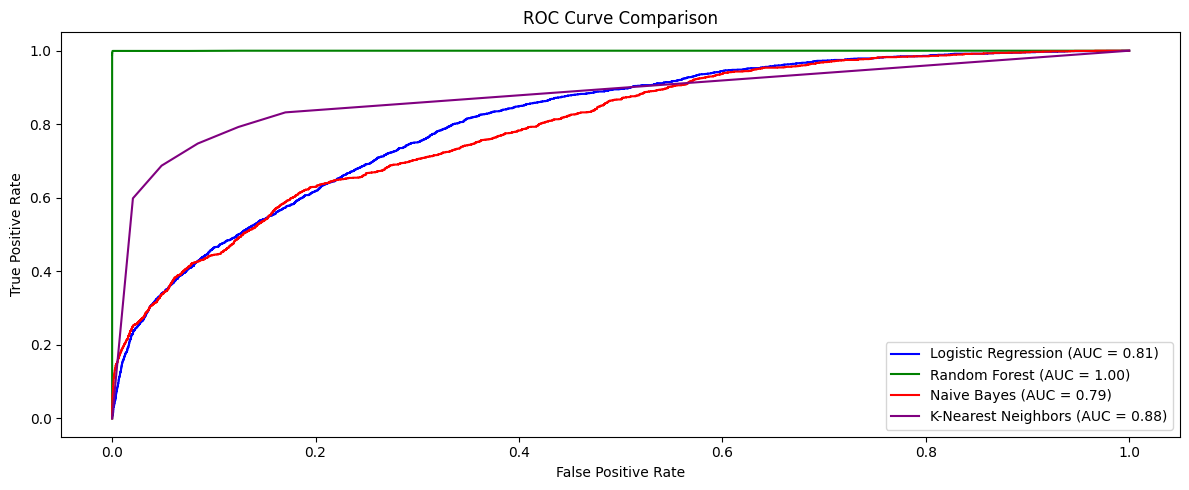

In [ ]:
# 9. Visualisasi Confusion Matrix (FIX)
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, ax=ax[0, 0], cmap='Blues')
ax[0, 0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, ax=ax[0, 1], cmap='Greens')
ax[0, 1].set_title("Random Forest")

ConfusionMatrixDisplay.from_estimator(nb_model, X_test, y_test, ax=ax[1, 0], cmap='Reds')
ax[1, 0].set_title("Naive Bayes")

ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test, ax=ax[1, 1], cmap='Purples')
ax[1, 1].set_title("K-Nearest Neighbors")

plt.tight_layout()
plt.show()

# ROC
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(12, 5))

# Logistic Regression
y_score_lr = lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_score_lr):.2f})', color = 'blue')

# Random Forest
y_score_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_score_rf):.2f})', color = 'green')

# Naive Bayes
y_score_nb = nb_model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_score_nb)
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_score(y_test, y_score_nb):.2f})', color = 'red')

# K-Nearest Neighbors
y_score_knn = knn_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {roc_auc_score(y_test, y_score_knn):.2f})', color = 'purple')

# Format plot
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# 1. Import library (FIX)
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# 2. Baca data training dan data testing dari Excel
train_data = pd.read_excel("train_data_resampled.xlsx")
test_data = pd.read_excel("test_data.xlsx")

# 3. Pisahkan fitur dan target
X_train = train_data.drop(columns="Fire Occurance")
y_train = train_data["Fire Occurance"]

X_test = test_data.drop(columns="Fire Occurance")
y_test = test_data["Fire Occurance"]

# 4. Standarisasi sebelum PCA (wajib untuk PCA agar skala fitur seragam)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. PCA: gunakan 5 Principal Components
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 6. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_pca, y_train)
y_pred_lr = lr_model.predict(X_test_pca)

# 7. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)
y_pred_rf = rf_model.predict(X_test_pca)

# 8. Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_pca, y_train)
y_pred_nb = nb_model.predict(X_test_pca)

# 9. K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_pca, y_train)
y_pred_knn = knn_model.predict(X_test_pca)

# === Evaluasi ===
print("\n=== Logistic Regression ===")
print("Akurasi:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("\n=== Random Forest ===")
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("\n=== Naive Bayes ===")
print("Akurasi:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

print("\n=== K-Nearest Neighbors ===")
print("Akurasi:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


=== Logistic Regression ===
Akurasi: 0.6854760362694301
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     22993
           1       0.15      0.73      0.24      1711

    accuracy                           0.69     24704
   macro avg       0.56      0.71      0.52     24704
weighted avg       0.91      0.69      0.76     24704


=== Random Forest ===
Akurasi: 0.9614232512953368
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     22993
           1       0.68      0.83      0.75      1711

    accuracy                           0.96     24704
   macro avg       0.83      0.90      0.86     24704
weighted avg       0.97      0.96      0.96     24704


=== Naive Bayes ===
Akurasi: 0.6432966321243523
              precision    recall  f1-score   support

           0       0.97      0.63      0.77     22993
           1       0.14      0.78      0.23      1711

    accuracy             

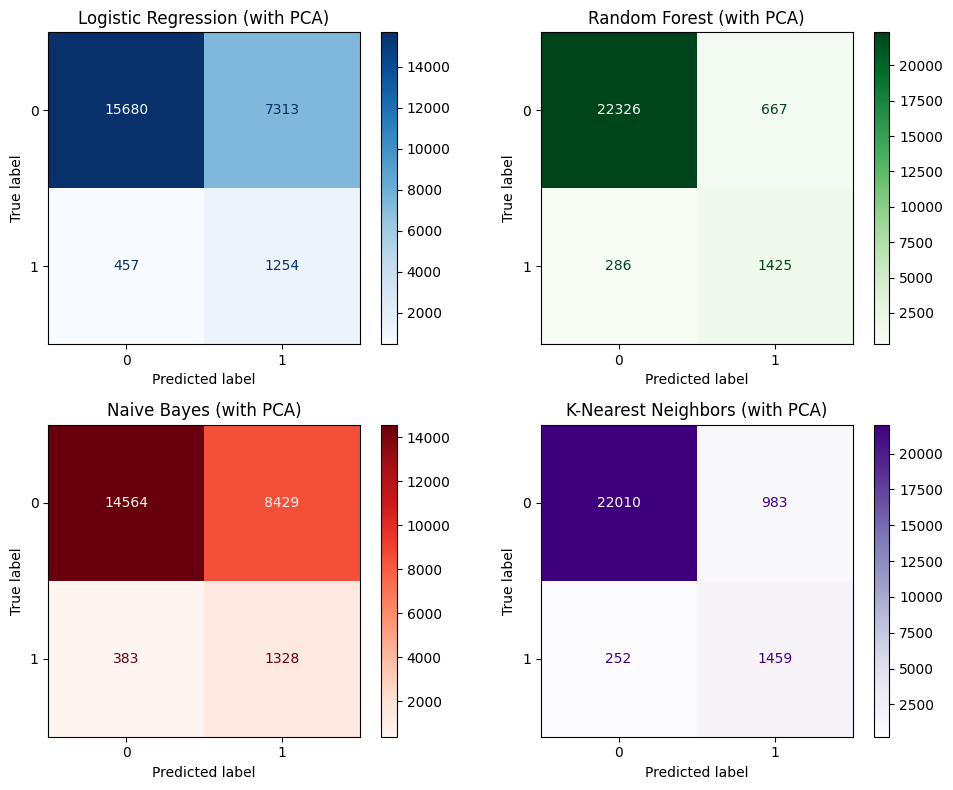

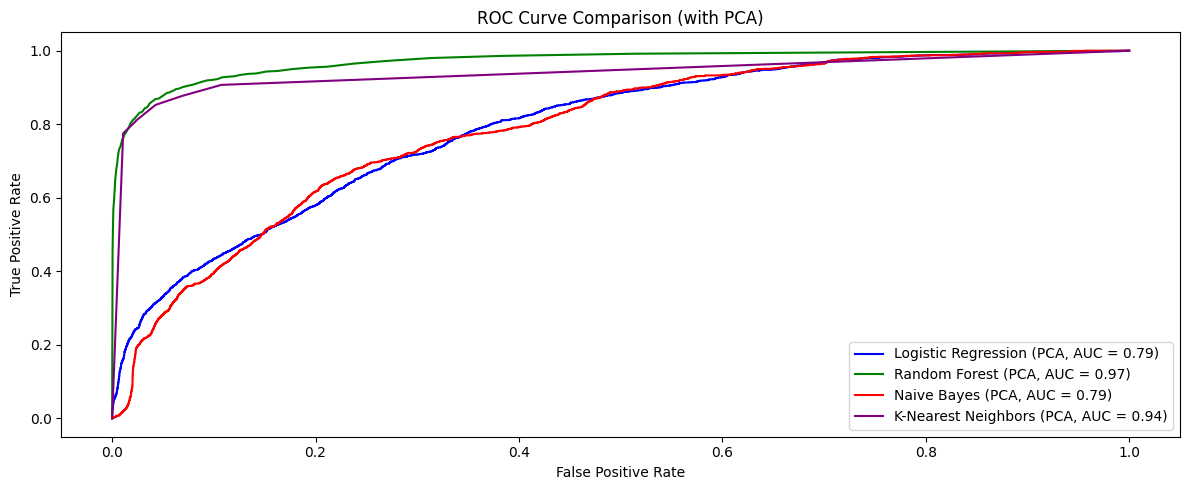

In [ ]:
# 9. Visualisasi Confusion Matrix (FIX)
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Use X_test_pca which was created in Cell 3 and has 5 features
ConfusionMatrixDisplay.from_estimator(lr_model, X_test_pca, y_test, ax=ax[0, 0], cmap='Blues')
ax[0, 0].set_title("Logistic Regression (with PCA)") # Add title context

# Use X_test_pca
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_pca, y_test, ax=ax[0, 1], cmap='Greens')
ax[0, 1].set_title("Random Forest (with PCA)") # Add title context

# Use X_test_pca
ConfusionMatrixDisplay.from_estimator(nb_model, X_test_pca, y_test, ax=ax[1, 0], cmap='Reds')
ax[1, 0].set_title("Naive Bayes (with PCA)") # Add title context

# Use X_test_pca
ConfusionMatrixDisplay.from_estimator(knn_model, X_test_pca, y_test, ax=ax[1, 1], cmap='Purples')
ax[1, 1].set_title("K-Nearest Neighbors (with PCA)") # Add title context


plt.tight_layout()
plt.show()

# ROC
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(12, 5))

# Logistic Regression
# Use X_test_pca for prediction
y_score_lr = lr_model.predict_proba(X_test_pca)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (PCA, AUC = {roc_auc_score(y_test, y_score_lr):.2f})', color = 'blue') # Add label context

# Random Forest
# Use X_test_pca for prediction
y_score_rf = rf_model.predict_proba(X_test_pca)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (PCA, AUC = {roc_auc_score(y_test, y_score_rf):.2f})', color = 'green') # Add label context

# Naive Bayes
# Use X_test_pca for prediction
y_score_nb = nb_model.predict_proba(X_test_pca)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_score_nb)
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (PCA, AUC = {roc_auc_score(y_test, y_score_nb):.2f})', color = 'red') # Add label context

# K-Nearest Neighbors
# Use X_test_pca for prediction
y_score_knn = knn_model.predict_proba(X_test_pca)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (PCA, AUC = {roc_auc_score(y_test, y_score_knn):.2f})', color = 'purple') # Add label context

# Format plot
plt.title('ROC Curve Comparison (with PCA)') # Add title context
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(False)
plt.tight_layout()
plt.show()

# **4. Visualization**

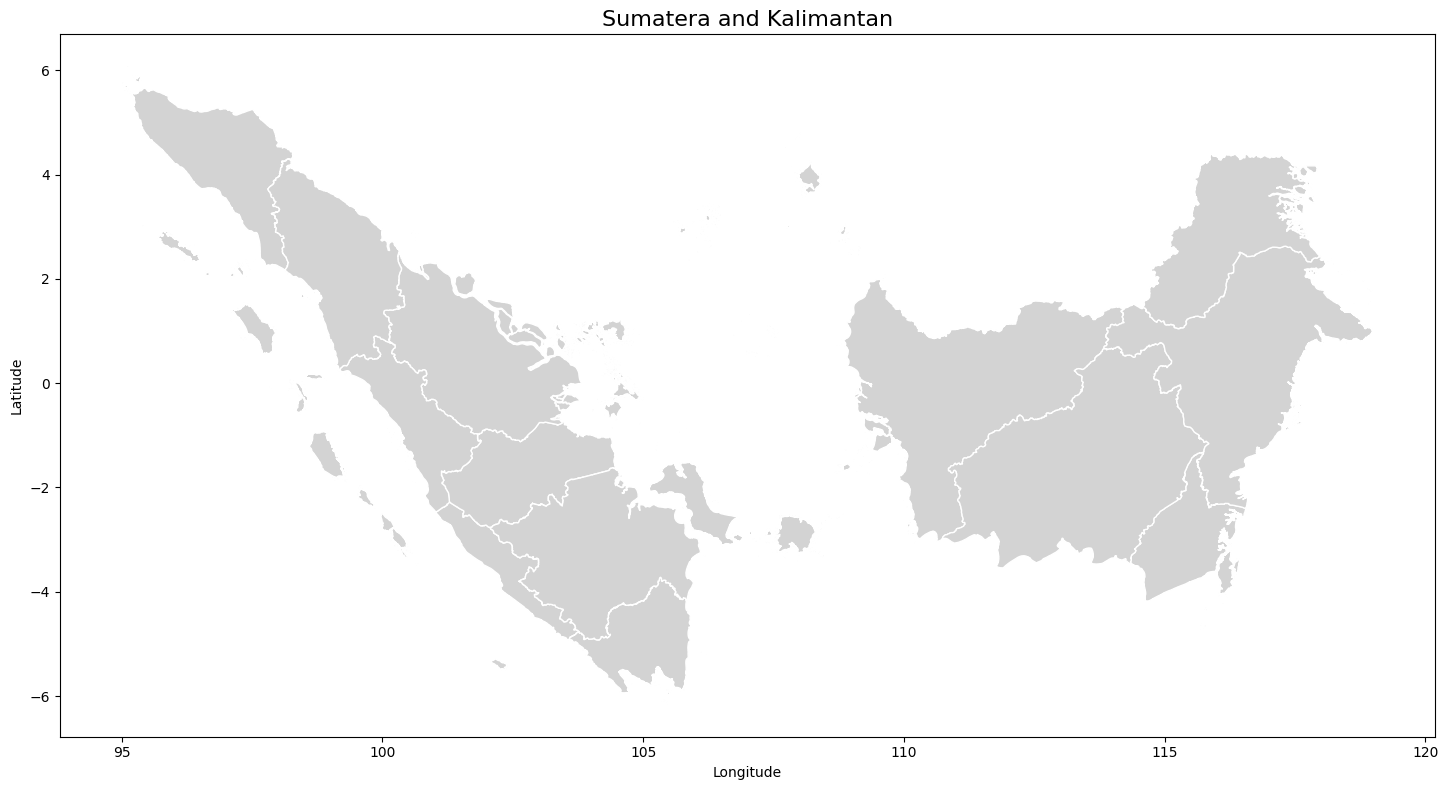

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Import shapefile Indonesia
shapefile_path = "selected_provinsi.shp"
indonesia = gpd.read_file(shapefile_path)

# Plot shapefile saja
fig, ax = plt.subplots(figsize=(16, 8))

indonesia.plot(
    ax=ax,
    color='lightgrey',
    edgecolor='white'
)

# Judul dan label
ax.set_title('Sumatera and Kalimantan', fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()

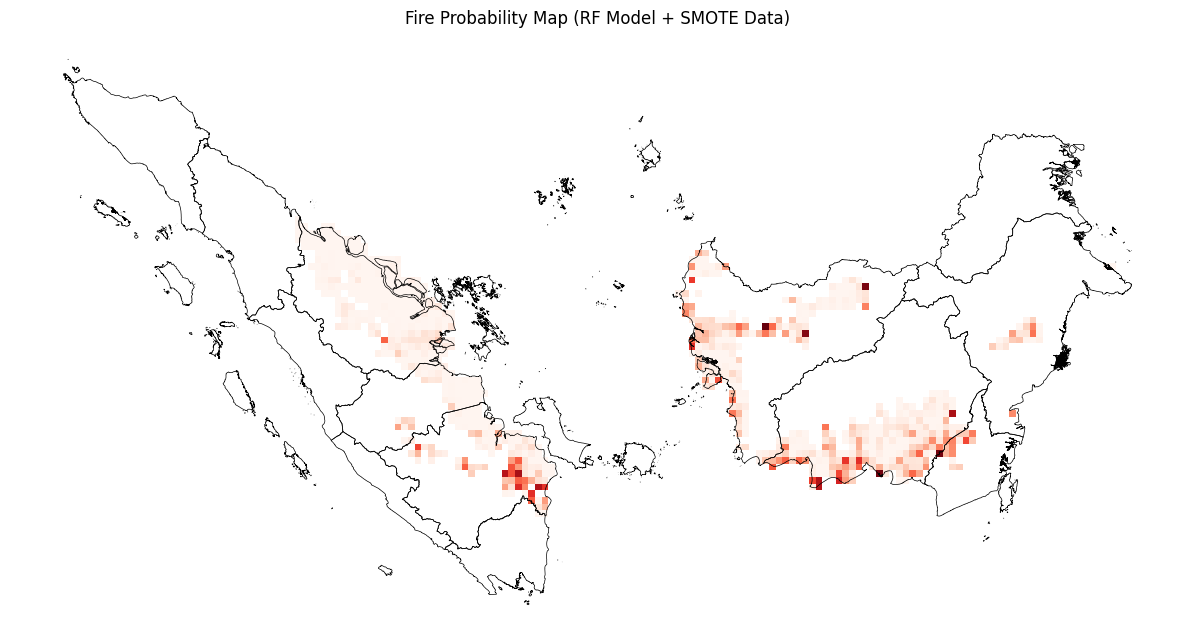

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# 1. Baca shapefile
shapefile_path = "selected_provinsi.shp"
indonesia = gpd.read_file(shapefile_path)

# 2. Baca data training dan testing dari Excel
train_data = pd.read_excel("train_data_resampled.xlsx")
test_data = pd.read_excel("test_data.xlsx")

# 3. Pisahkan fitur dan target
X_train = train_data.drop(columns="Fire Occurance")
y_train = train_data["Fire Occurance"]

X_test = test_data.drop(columns="Fire Occurance")
y_test = test_data["Fire Occurance"]

# 4. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_score_rf = rf_model.predict_proba(X_test)[:, 1]

# 5. Tambahkan hasil ke test set
data_plot = X_test.copy()
data_plot['prob_rf'] = y_score_rf

# 6. Grid binning berdasarkan longitude dan latitude
grid_size = 0.15
data_plot['lon_bin'] = (data_plot['Longitude'] // grid_size) * grid_size
data_plot['lat_bin'] = (data_plot['Latitude'] // grid_size) * grid_size

# 7. Hitung rata-rata probabilitas per grid
grid_avg = data_plot.groupby(['lon_bin', 'lat_bin'])['prob_rf'].mean().reset_index()

# 8. Plotting
fig, ax = plt.subplots(figsize=(16, 6))

# Colormap
cmap = plt.cm.Reds
vmin = grid_avg['prob_rf'].min()
vmax = grid_avg['prob_rf'].max()

# Tambahkan kotak grid ke peta
for _, row in grid_avg.iterrows():
    x = row['lon_bin']
    y = row['lat_bin']
    val = row['prob_rf']
    color = cmap((val - vmin) / (vmax - vmin))
    ax.add_patch(plt.Rectangle(
        (x, y), grid_size, grid_size,
        facecolor=color, edgecolor='none'
    ))

# Tambahkan shapefile outline
indonesia.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.5)

# Judul dan tampilan akhir
ax.set_title('Fire Probability Map (RF Model + SMOTE Data)', fontsize=12)
ax.set_axis_off()
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()

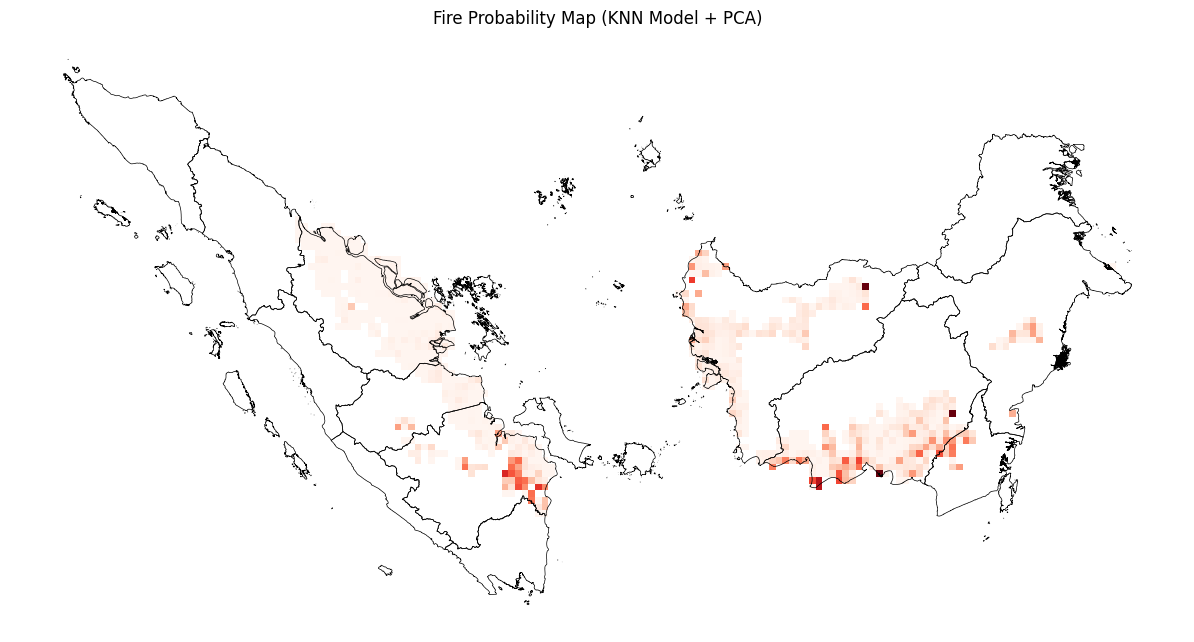

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 1. Baca shapefile
shapefile_path = "selected_provinsi.shp"
indonesia = gpd.read_file(shapefile_path)

# 2. Baca data training dan testing dari Excel
train_data = pd.read_excel("train_data.xlsx")
test_data = pd.read_excel("test_data.xlsx")

# 3. Simpan koordinat untuk plotting
train_coords = train_data[['Longitude', 'Latitude']].reset_index(drop=True)
test_coords = test_data[['Longitude', 'Latitude']].reset_index(drop=True)

# 4. Pisahkan fitur dan target (hilangkan Longitude, Latitude sebelum PCA)
X_train_raw = train_data.drop(columns=["Fire Occurance", "Longitude", "Latitude"])
y_train = train_data["Fire Occurance"]

X_test_raw = test_data.drop(columns=["Fire Occurance", "Longitude", "Latitude"])
y_test = test_data["Fire Occurance"]

# 5. Standarisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

# 6. PCA (ambil 5 komponen)
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 7. Tambahkan kembali koordinat ke hasil PCA
X_train = pd.DataFrame(X_train_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
X_train[['Longitude', 'Latitude']] = train_coords

X_test = pd.DataFrame(X_test_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
X_test[['Longitude', 'Latitude']] = test_coords

# 8. K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train.drop(columns=["Longitude", "Latitude"]), y_train)
y_score_knn = knn_model.predict_proba(X_test.drop(columns=["Longitude", "Latitude"]))[:, 1]

# 9. Tambahkan hasil ke test set
data_plot = X_test.copy()
data_plot['prob_knn'] = y_score_knn

# 10. Grid binning
grid_size = 0.15
data_plot['lon_bin'] = (data_plot['Longitude'] // grid_size) * grid_size
data_plot['lat_bin'] = (data_plot['Latitude'] // grid_size) * grid_size

# 11. Hitung rata-rata probabilitas per grid
grid_avg = data_plot.groupby(['lon_bin', 'lat_bin'])['prob_knn'].mean().reset_index()

# 12. Plotting
fig, ax = plt.subplots(figsize=(16, 6))

# Colormap
cmap = plt.cm.Reds
vmin = grid_avg['prob_knn'].min()
vmax = grid_avg['prob_knn'].max()

# Tambahkan grid ke peta
for _, row in grid_avg.iterrows():
    x = row['lon_bin']
    y = row['lat_bin']
    val = row['prob_knn']
    color = cmap((val - vmin) / (vmax - vmin))
    ax.add_patch(plt.Rectangle(
        (x, y), grid_size, grid_size,
        facecolor=color, edgecolor='none'
    ))

# Tambahkan shapefile outline
indonesia.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.5)

# Judul dan tampilan akhir
ax.set_title('Fire Probability Map (KNN Model + PCA)', fontsize=12)
ax.set_axis_off()
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()

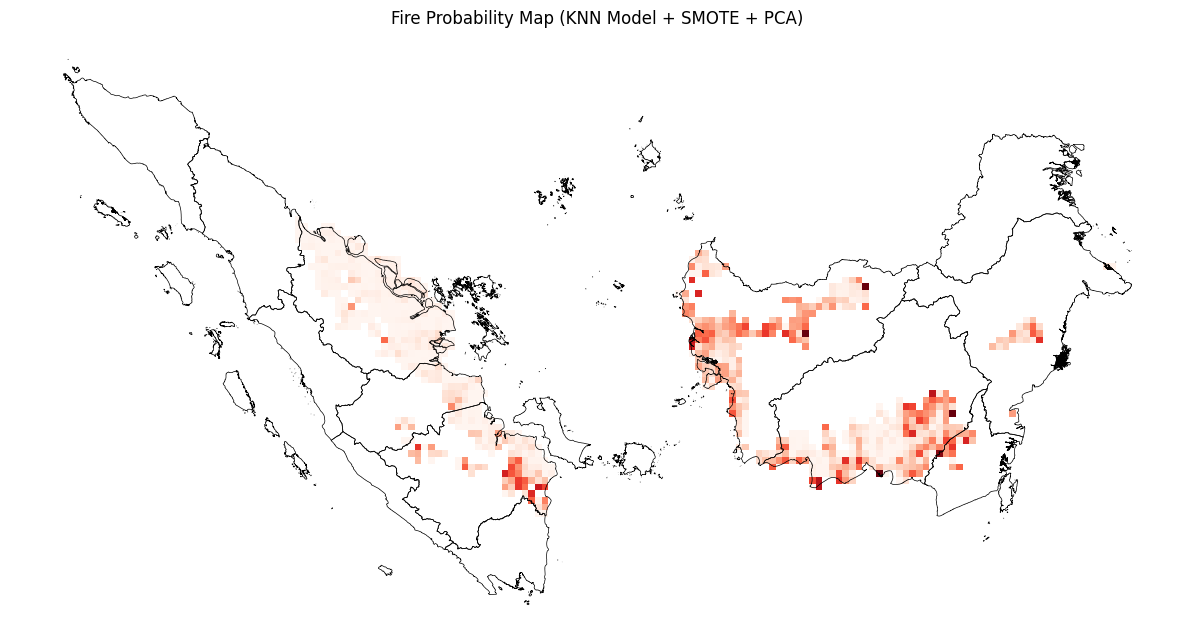

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 1. Baca shapefile
shapefile_path = "selected_provinsi.shp"
indonesia = gpd.read_file(shapefile_path)

# 2. Baca data training dan testing dari Excel
train_data = pd.read_excel("train_data_resampled.xlsx")
test_data = pd.read_excel("test_data.xlsx")

# 3. Simpan koordinat untuk plotting
train_coords = train_data[['Longitude', 'Latitude']].reset_index(drop=True)
test_coords = test_data[['Longitude', 'Latitude']].reset_index(drop=True)

# 4. Pisahkan fitur dan target (hilangkan Longitude, Latitude sebelum PCA)
X_train_raw = train_data.drop(columns=["Fire Occurance", "Longitude", "Latitude"])
y_train = train_data["Fire Occurance"]

X_test_raw = test_data.drop(columns=["Fire Occurance", "Longitude", "Latitude"])
y_test = test_data["Fire Occurance"]

# 5. Standarisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

# 6. PCA (ambil 5 komponen)
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 7. Tambahkan kembali koordinat ke hasil PCA
X_train = pd.DataFrame(X_train_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
X_train[['Longitude', 'Latitude']] = train_coords

X_test = pd.DataFrame(X_test_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
X_test[['Longitude', 'Latitude']] = test_coords

# 8. K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train.drop(columns=["Longitude", "Latitude"]), y_train)
y_score_knn = knn_model.predict_proba(X_test.drop(columns=["Longitude", "Latitude"]))[:, 1]

# 9. Tambahkan hasil ke test set
data_plot = X_test.copy()
data_plot['prob_knn'] = y_score_knn

# 10. Grid binning
grid_size = 0.15
data_plot['lon_bin'] = (data_plot['Longitude'] // grid_size) * grid_size
data_plot['lat_bin'] = (data_plot['Latitude'] // grid_size) * grid_size

# 11. Hitung rata-rata probabilitas per grid
grid_avg = data_plot.groupby(['lon_bin', 'lat_bin'])['prob_knn'].mean().reset_index()

# 12. Plotting
fig, ax = plt.subplots(figsize=(16, 6))

# Colormap
cmap = plt.cm.Reds
vmin = grid_avg['prob_knn'].min()
vmax = grid_avg['prob_knn'].max()

# Tambahkan grid ke peta
for _, row in grid_avg.iterrows():
    x = row['lon_bin']
    y = row['lat_bin']
    val = row['prob_knn']
    color = cmap((val - vmin) / (vmax - vmin))
    ax.add_patch(plt.Rectangle(
        (x, y), grid_size, grid_size,
        facecolor=color, edgecolor='none'
    ))

# Tambahkan shapefile outline
indonesia.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.5)

# Judul dan tampilan akhir
ax.set_title('Fire Probability Map (KNN Model + SMOTE + PCA)', fontsize=12)
ax.set_axis_off()
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()

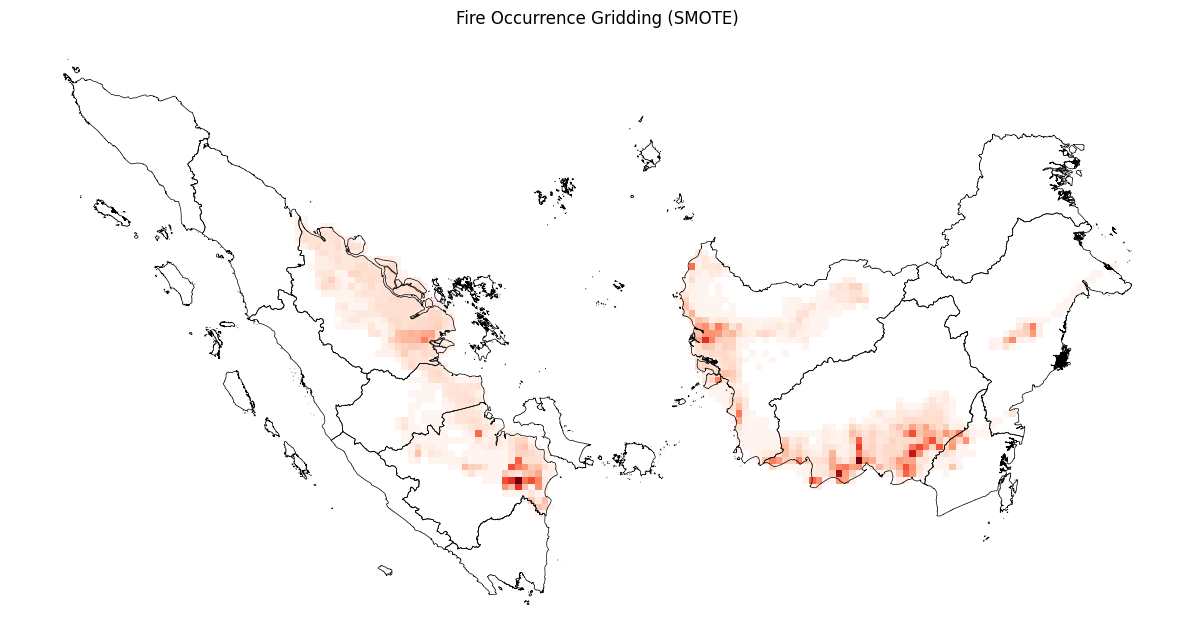

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Baca shapefile
shapefile_path = "selected_provinsi.shp"
indonesia = gpd.read_file(shapefile_path)

# 2. Baca data training dari Excel
train_data = pd.read_excel("train_data_resampled.xlsx")

# 3. Ambil hanya Longitude dan Latitude
data_plot = train_data[['Longitude', 'Latitude']].copy()

# 4. Grid binning
grid_size = 0.15
data_plot['lon_bin'] = (data_plot['Longitude'] // grid_size) * grid_size
data_plot['lat_bin'] = (data_plot['Latitude'] // grid_size) * grid_size

# 5. Hitung jumlah data per grid
grid_count = data_plot.groupby(['lon_bin', 'lat_bin']).size().reset_index(name='count')

# 6. Plotting
fig, ax = plt.subplots(figsize=(16, 6))

# Colormap
cmap = plt.cm.Reds
vmin = grid_count['count'].min()
vmax = grid_count['count'].max()

# Tambahkan kotak grid ke peta
for _, row in grid_count.iterrows():
    x = row['lon_bin']
    y = row['lat_bin']
    count = row['count']
    color = cmap((count - vmin) / (vmax - vmin))
    ax.add_patch(plt.Rectangle(
        (x, y), grid_size, grid_size,
        facecolor=color, edgecolor='none'
    ))

# Tambahkan shapefile outline
indonesia.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.5)

# Judul dan tampilan akhir
ax.set_title('Fire Occurrence Gridding (SMOTE)', fontsize=12)
ax.set_axis_off()
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()

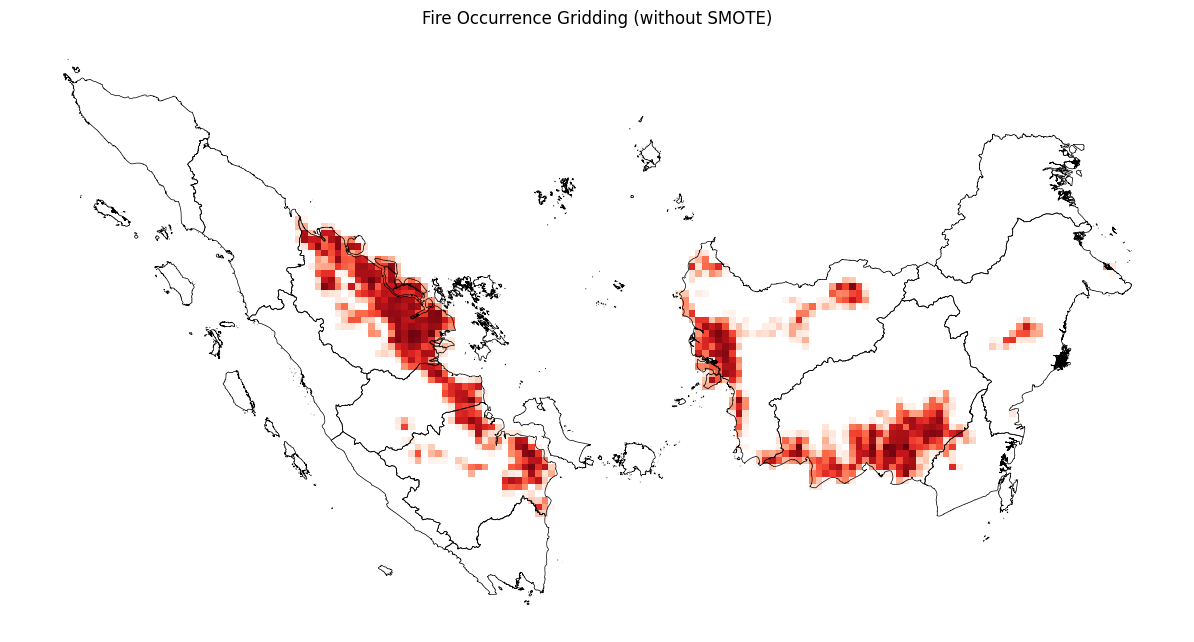

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Baca shapefile
shapefile_path = "selected_provinsi.shp"
indonesia = gpd.read_file(shapefile_path)

# 2. Baca data training dari Excel
train_data = pd.read_excel("train_data.xlsx")

# 3. Ambil hanya Longitude dan Latitude
data_plot = train_data[['Longitude', 'Latitude']].copy()

# 4. Grid binning
grid_size = 0.15
data_plot['lon_bin'] = (data_plot['Longitude'] // grid_size) * grid_size
data_plot['lat_bin'] = (data_plot['Latitude'] // grid_size) * grid_size

# 5. Hitung jumlah data per grid
grid_count = data_plot.groupby(['lon_bin', 'lat_bin']).size().reset_index(name='count')

# 6. Plotting
fig, ax = plt.subplots(figsize=(16, 6))

# Colormap
cmap = plt.cm.Reds
vmin = grid_count['count'].min()
vmax = grid_count['count'].max()

# Tambahkan kotak grid ke peta
for _, row in grid_count.iterrows():
    x = row['lon_bin']
    y = row['lat_bin']
    count = row['count']
    color = cmap((count - vmin) / (vmax - vmin))
    ax.add_patch(plt.Rectangle(
        (x, y), grid_size, grid_size,
        facecolor=color, edgecolor='none'
    ))

# Tambahkan shapefile outline
indonesia.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.5)

# Judul dan tampilan akhir
ax.set_title('Fire Occurrence Gridding (without SMOTE)', fontsize=12)
ax.set_axis_off()
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()